In [2]:
from IPython.display import Math
Math(r'\dot{y} = -x^3 + x^2 + 2x')


<IPython.core.display.Math object>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from numpy import linalg
import numpy as np
import cmath
import pandas as pd
import seaborn as sns
print('success!')

success!


In [2]:
#Уравнение для системы
def pendula (freq):
    def rhs(t, X):
        x, y = X
        return [y, -x**3 + x**2 + x*2 - freq*y]
    return rhs

#Построение векторного поля
def eq_quiver(rhs, limits, N=16):
    xlims, ylims = limits
    xs=np.linspace(xlims[0], xlims[1], N)
    ys=np.linspace(ylims[0], ylims[1], N)
    U=np.zeros((N, N))
    V=np.zeros((N, N))
    for i, y in enumerate(ys):
        for j, x in enumerate(xs):
            vfield=rhs(0., [x,y])
            u, v =vfield
            U[i, j]=u
            V[i, j]=v
    return xs, ys, U, V

In [3]:
#Матрицы Якоби для консервативной системы и для системы с диссипацией
def jacobi(x, y, a):
    return np.array([[0.0, 1.0], [2*x - 3 * (x**2) + 2, -a]])

In [12]:
#Нахождение собственных векторов
def selfvect(x, y, a):
    A = jacobi(x, y, a)
    w, v=linalg.eig(A)
    x1=v[0][0]
    y1=v[0][1]
    x2=v[1][0]
    y2=v[1][1]
    return [w, [[x1, y1], [x2, y2]]]


In [41]:
#Устойчивость состояния равновесия
def stability(x, y, a):
        r=selfvect(x, y, a)
        w1=complex(r[0][0])
        w2=complex(r[0][1])
        if w1.imag !=0:
            if not (w1.real and w2.real):
                return 'bo'
            else:
                if w1.imag < 0 and w2.imag < 0:
                    return 'bo'
                else:
                    return 'r+'
        else:
            if w1.real * w2.real < 0:
                return 'r+'
            else:
                if w1.real < 0:
                    return 'bo'
                else:
                    return 'r+'

#Сепаратрисы 
def seps(x, y, a):
    r=selfvect(x, y, a)[1]
    x1=(x+r[0][0])*0.00001
    x2=(x+r[1][0])*0.00001
    y1=(y+r[0][1])*0.00001
    y2=(y+r[1][1])*0.00001
    x12=(x-r[0][0])*0.00001
    y12=(y-r[0][1])*0.00001
    x22=(x-r[1][0])*0.00001
    y22=(y-r[1][1])*0.00001
    return ([(x1, y1), (x2, y2), (x12, y12), (x22, y22)])

In [6]:
#Строим траектории
def plotOnPlane(rhs, pts, times, limits, modes, a):
    ab = []
    ac = []
    xlims, ylims=limits
    plt.figure(figsize=(15, 10))
    plt.xlim([xlims[0], xlims[1]])
    plt.ylim([ylims[0], ylims[1]])
    xs, ys, U, V =eq_quiver(rhs, limits, 16)
    plt.quiver(xs, ys, U, V, alpha=0.8)
    for pt, maxT, mode in zip(pts, times, modes):
        sol=solve_ivp(rhs, [0, maxT], pt, method='RK45', rtol=1e-12)
        xs, ys=sol.y
        ac.append(sol.t)
        ab.append(xs)
        plt.plot(xs, ys, mode) 
    plt.plot(0, 0, stability(0, 0, a))
    plt.plot(-1, 0, stability(-1, 0, a))
    plt.plot(2, 0, stability(-1, 0, a))
    return [ac, ab]

In [20]:
seps(0, 0, -5)

[(-9.371641612794526e-05, -1.8299737893132022e-05),
 (3.488887140814106e-05, -9.831134010399143e-05),
 (9.371641612794526e-05, 1.8299737893132022e-05),
 (-3.488887140814106e-05, 9.831134010399143e-05)]

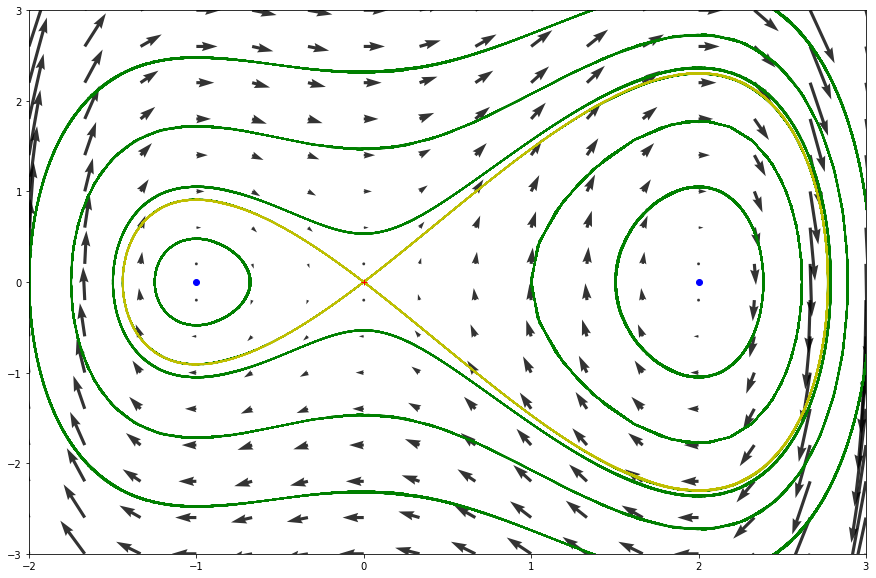

In [9]:
# консервативная система
a=0
freq=0
rhs=pendula(freq)
pts = []

pts = [(-2, 0), (-1.5, 0), (-1.75, 0), (-1.25, 0), (1, 0), (1.5, 0), seps(0, 0, a)[1], seps(0, 0, a)[2]]
pts.extend(pts)

timespos = np.empty(int(len(pts)/2))
timespos.fill(150)
timesneg = np.empty(int(len(pts)/2))
timesneg.fill(-150)
times = np.concatenate((timespos, timesneg), axis=0)

limits=[(-2.0, 3.0), (-3.0, 3.0)]
dep0 = plotOnPlane(rhs, pts,
             times, 
             limits, ('g- '*(len(pts)-2)).split() + ['y-', 'y-'], a)

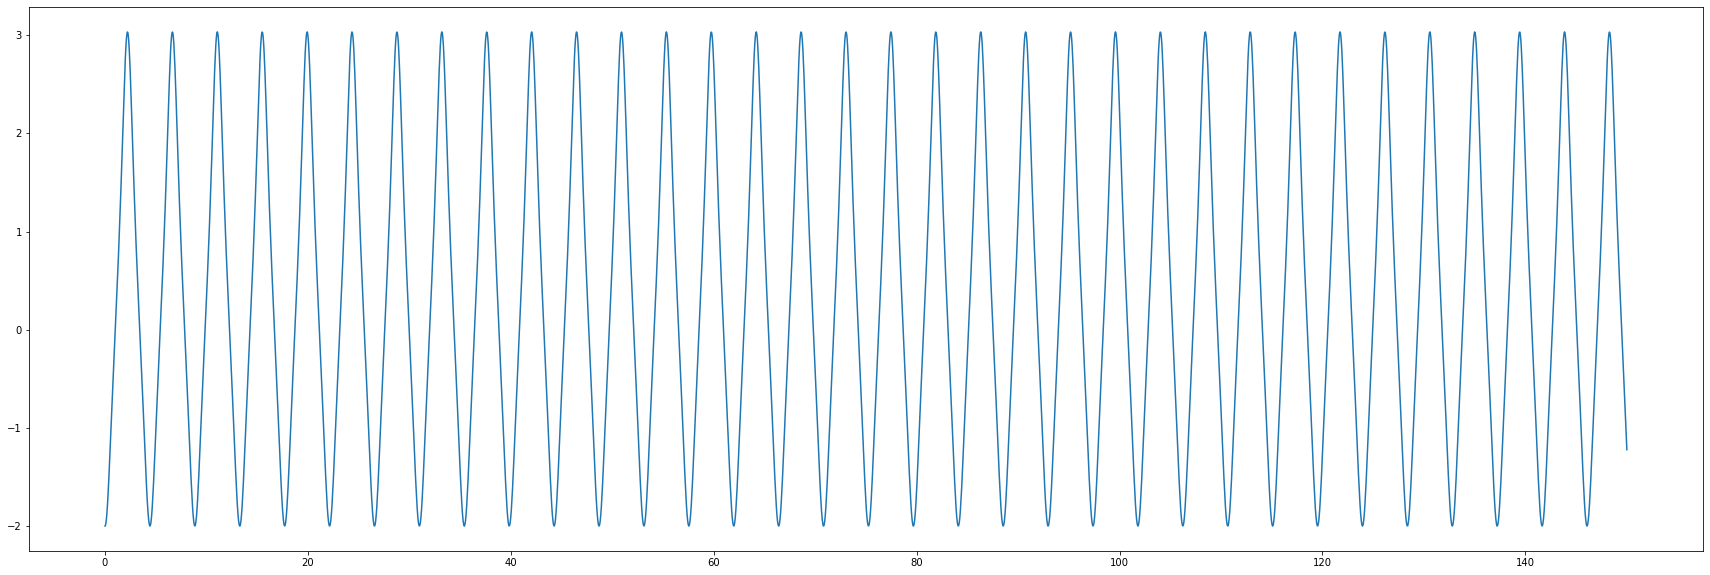

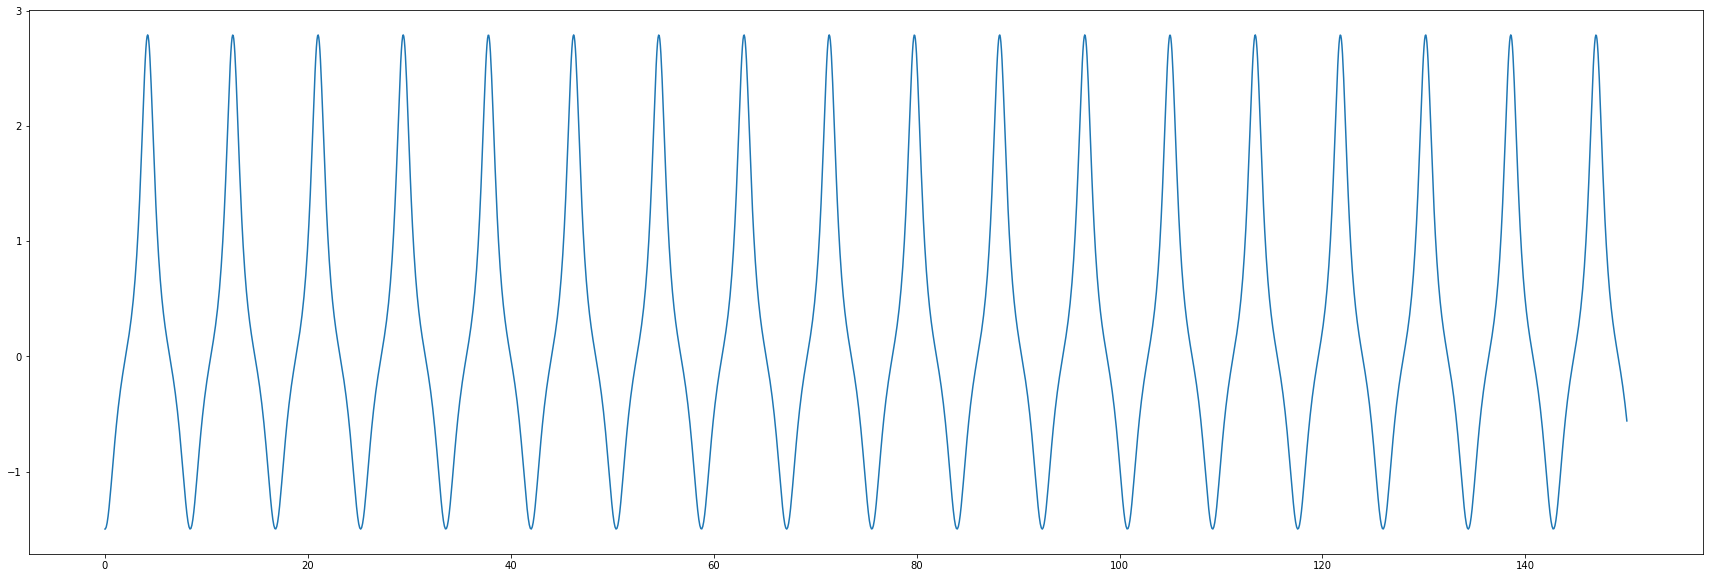

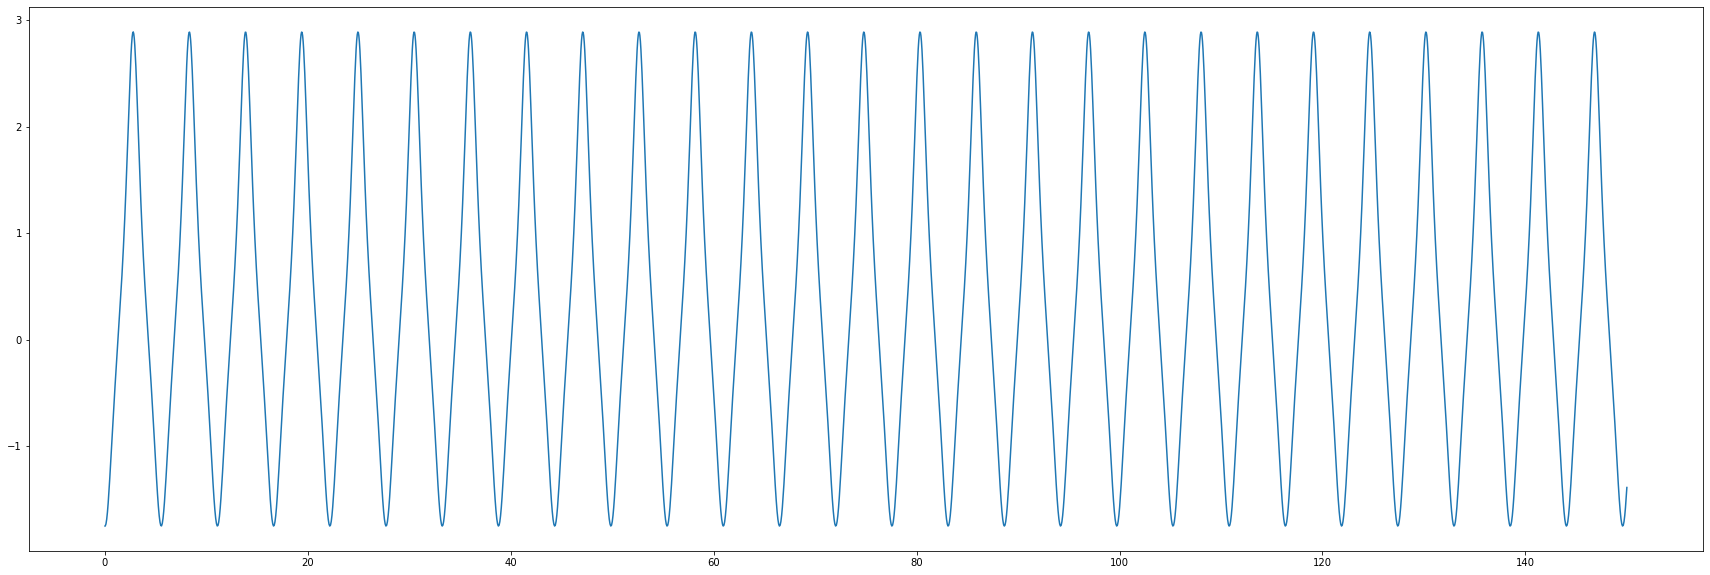

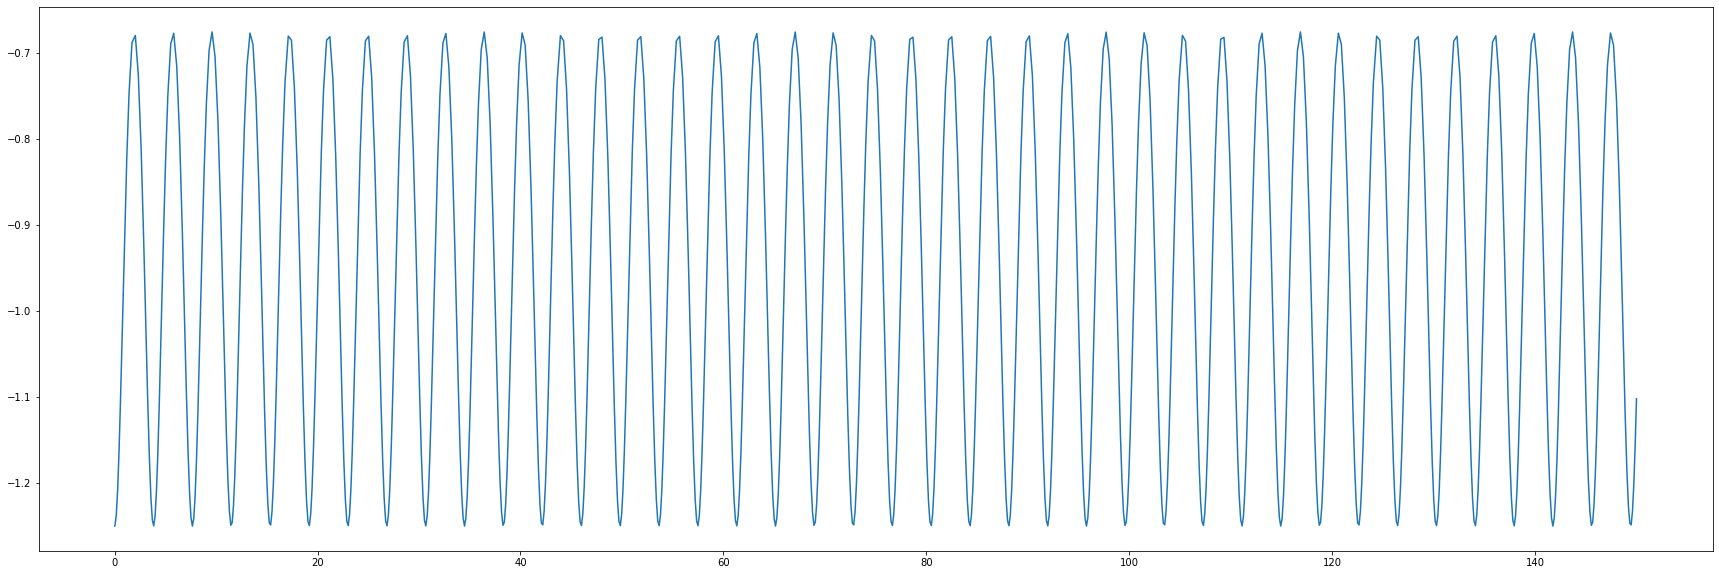

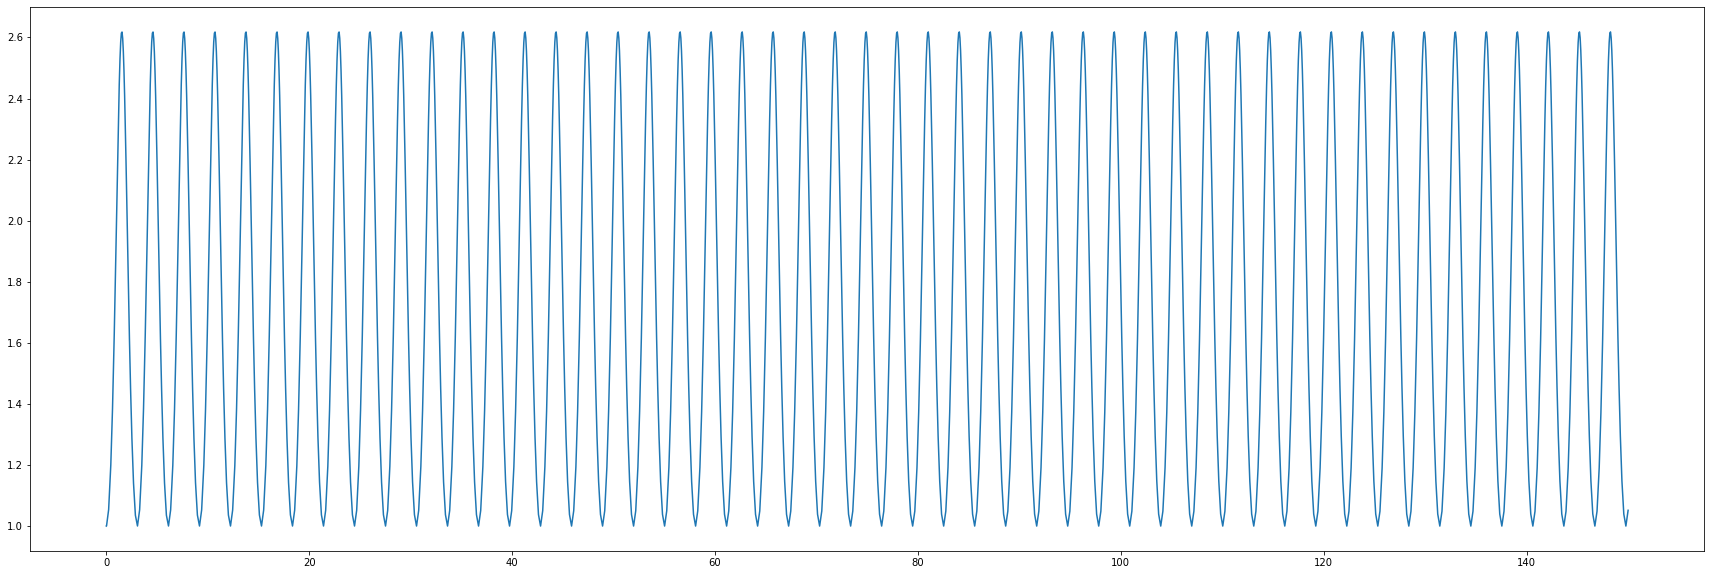

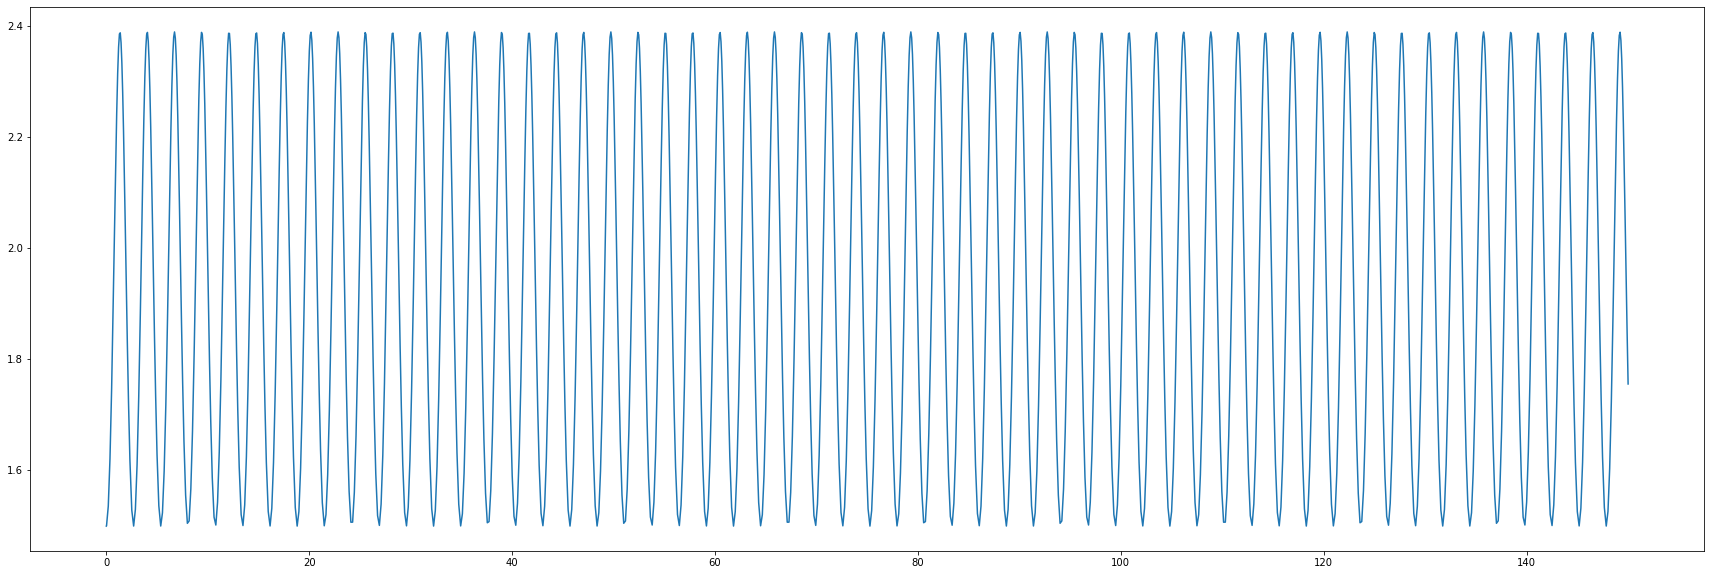

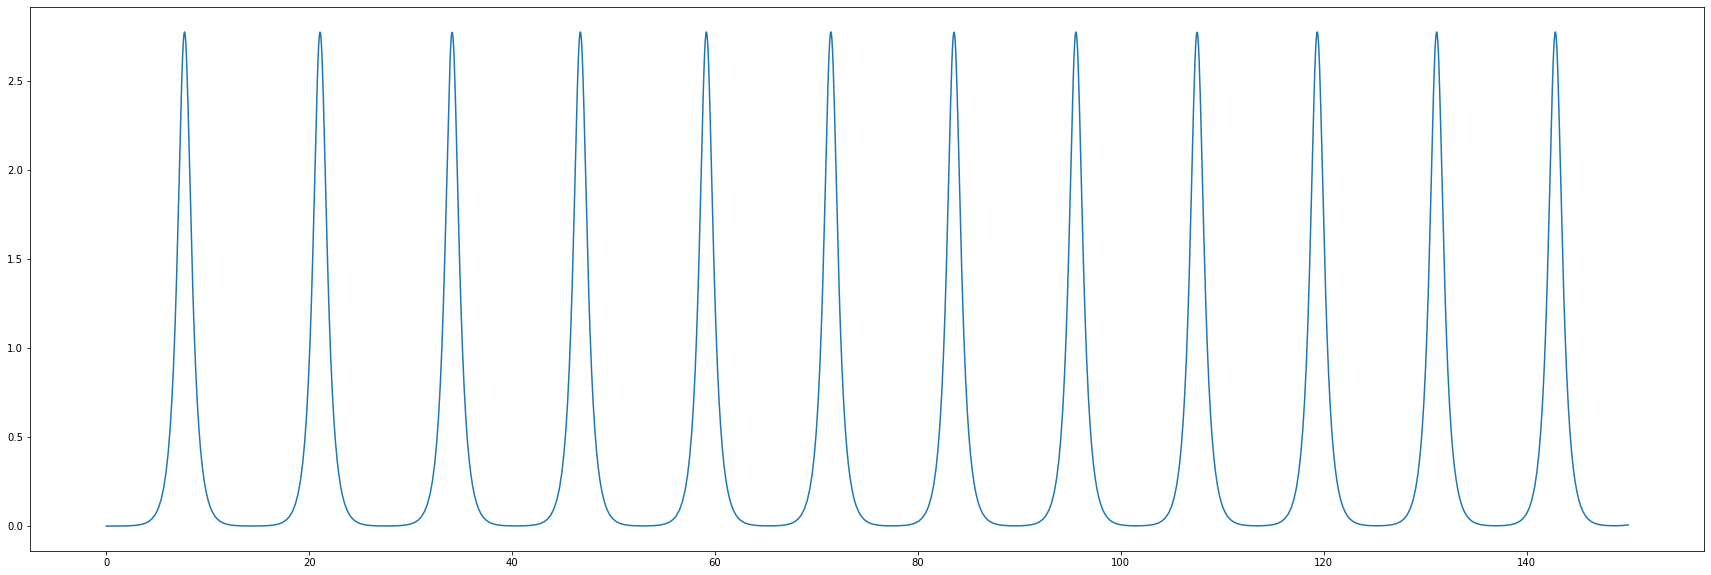

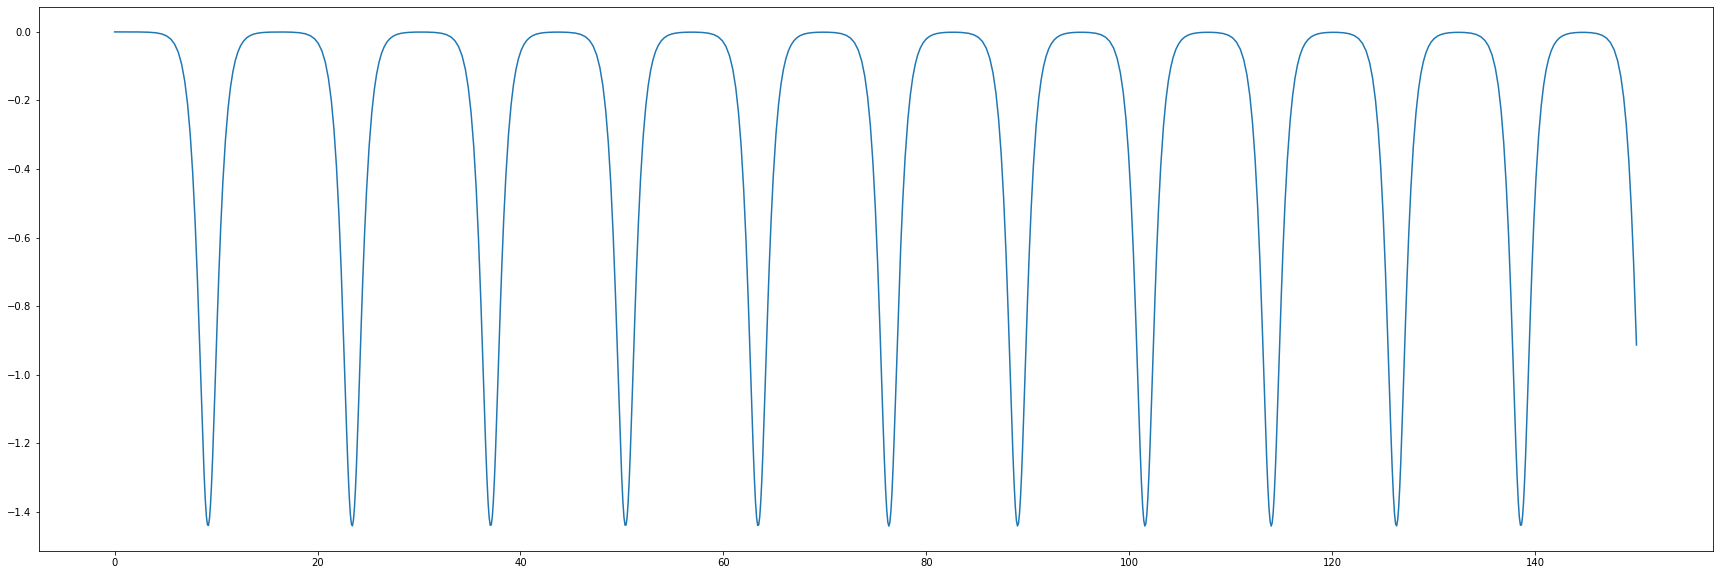

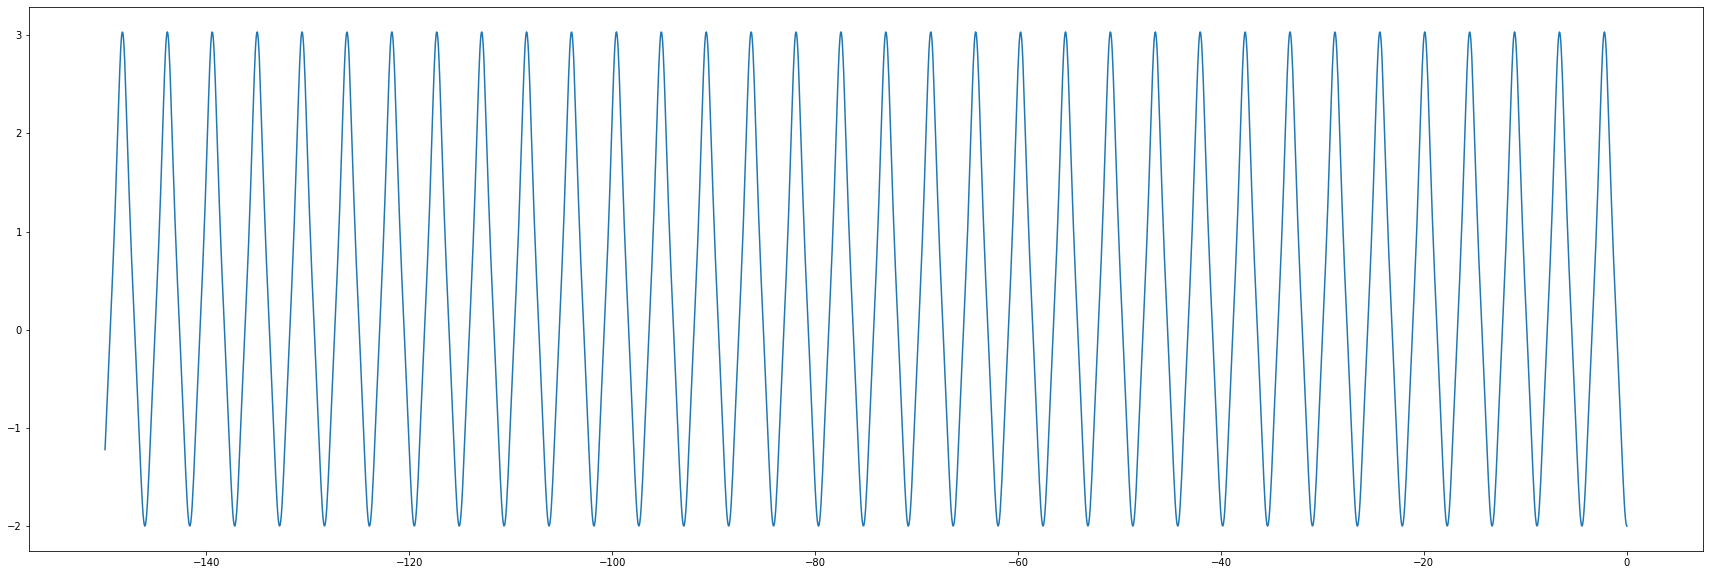

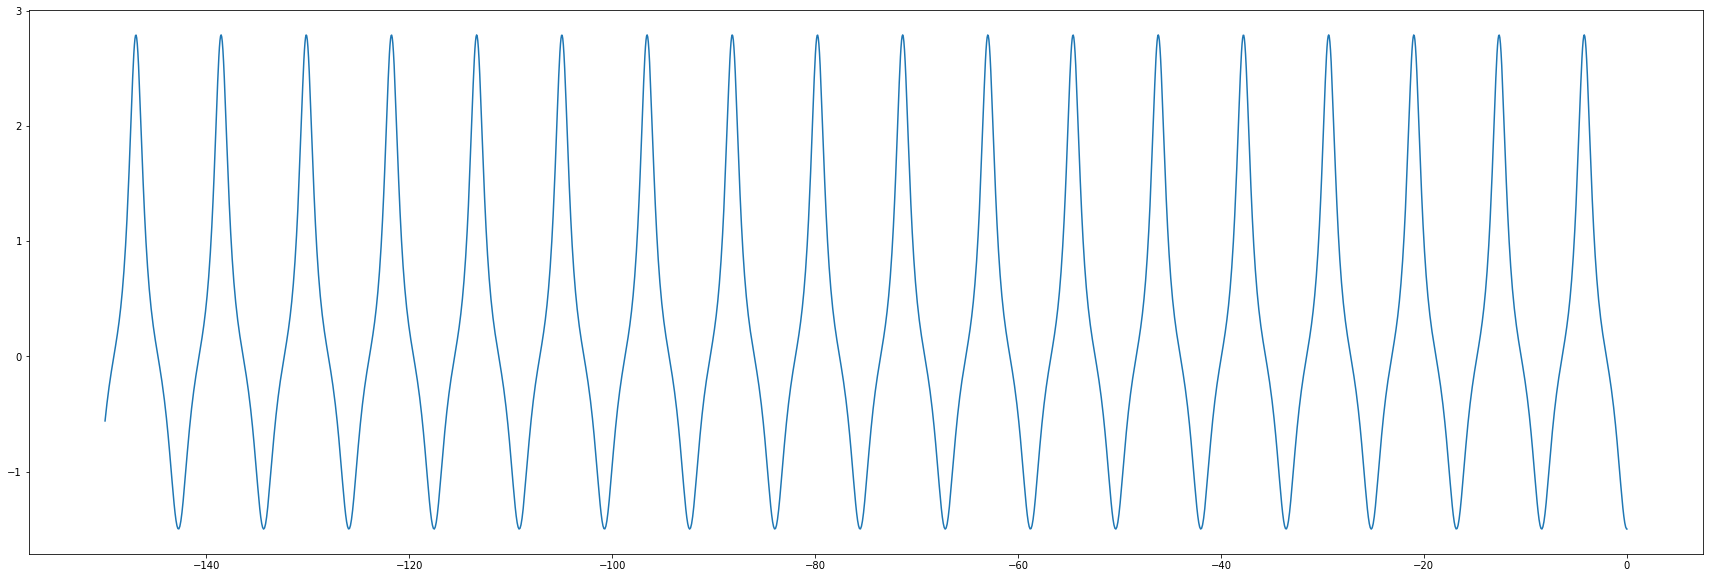

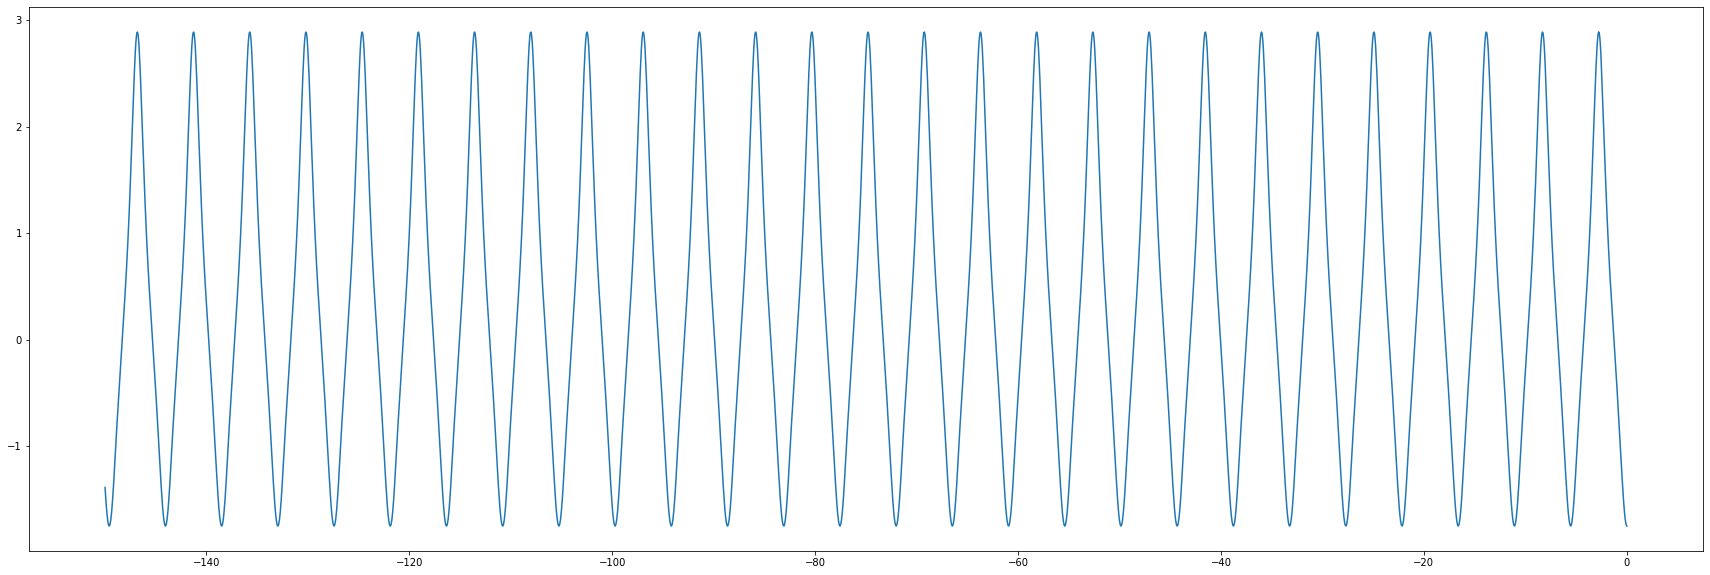

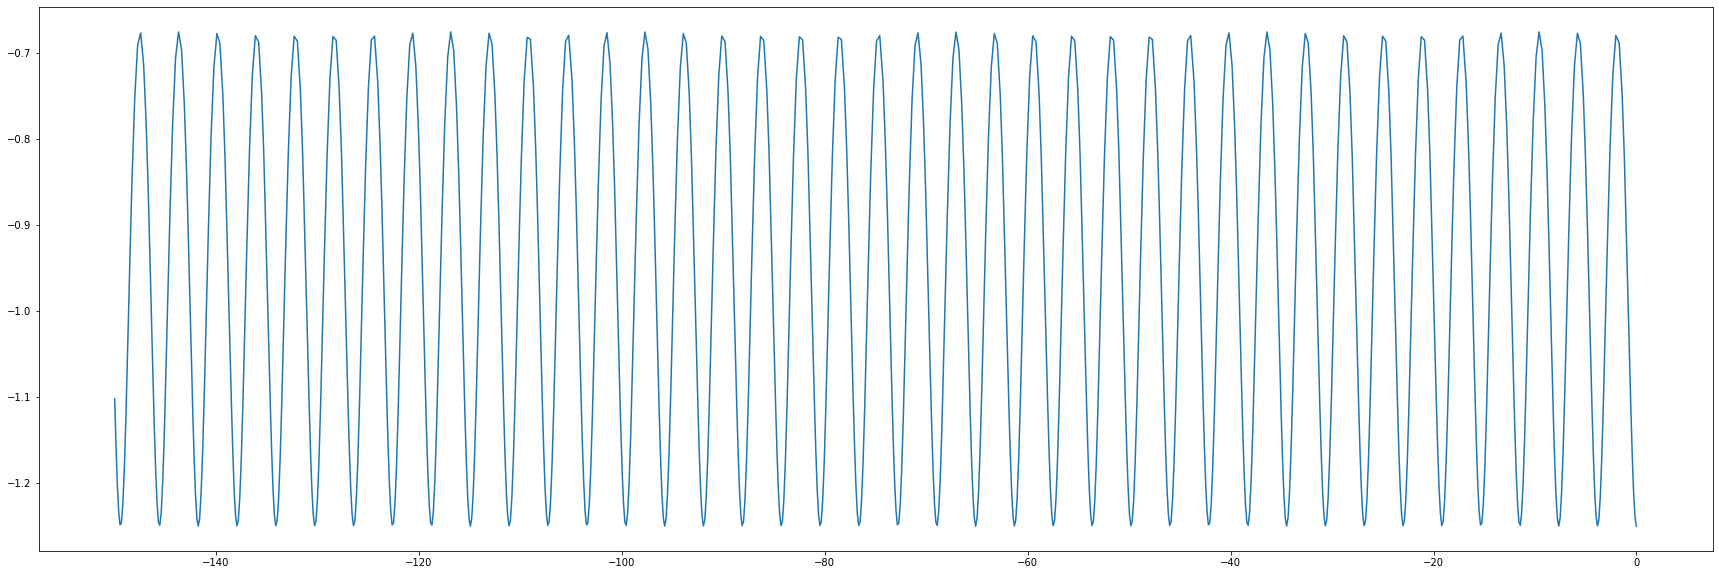

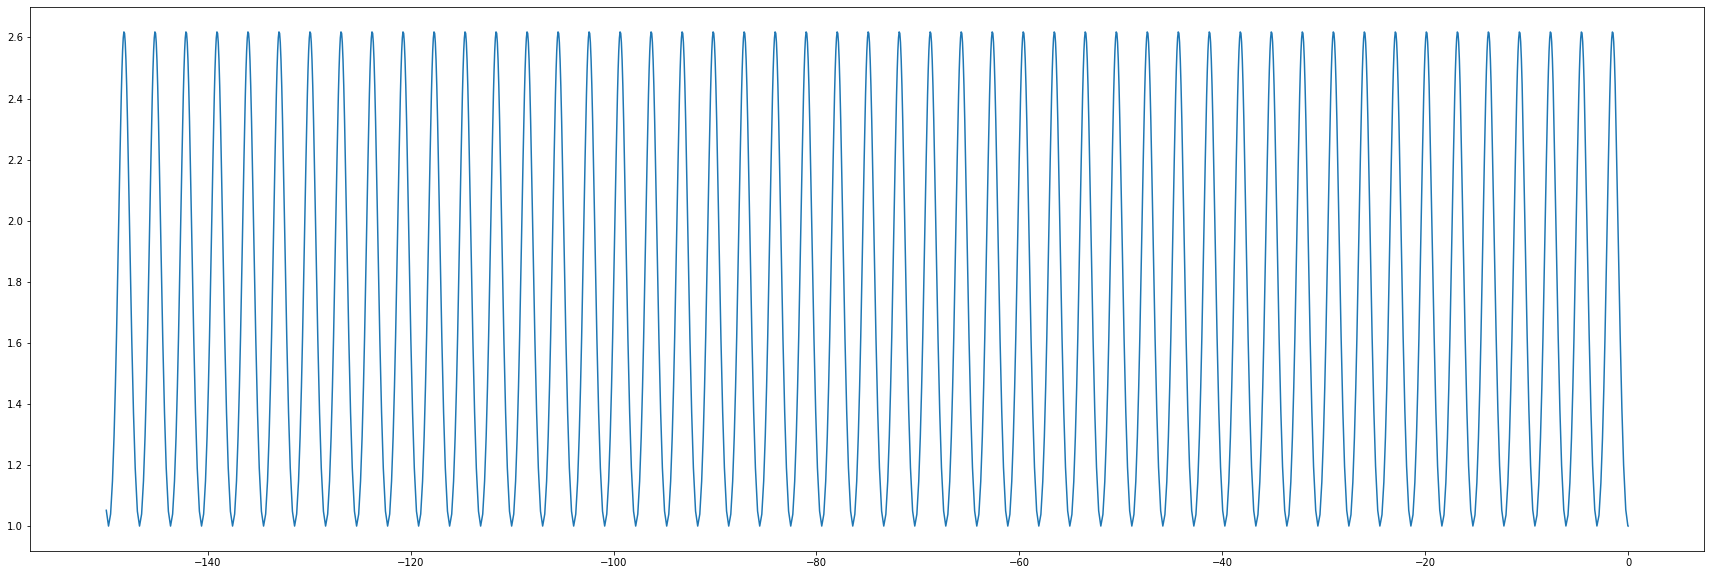

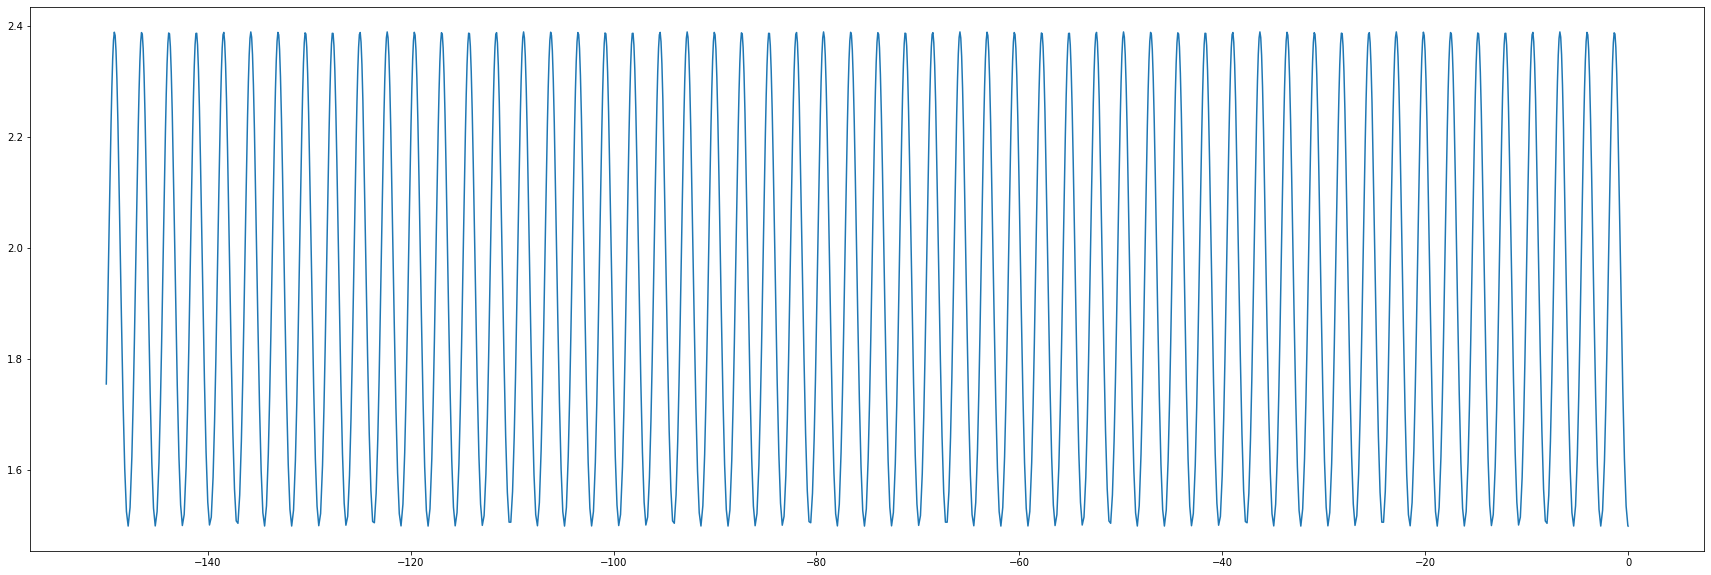

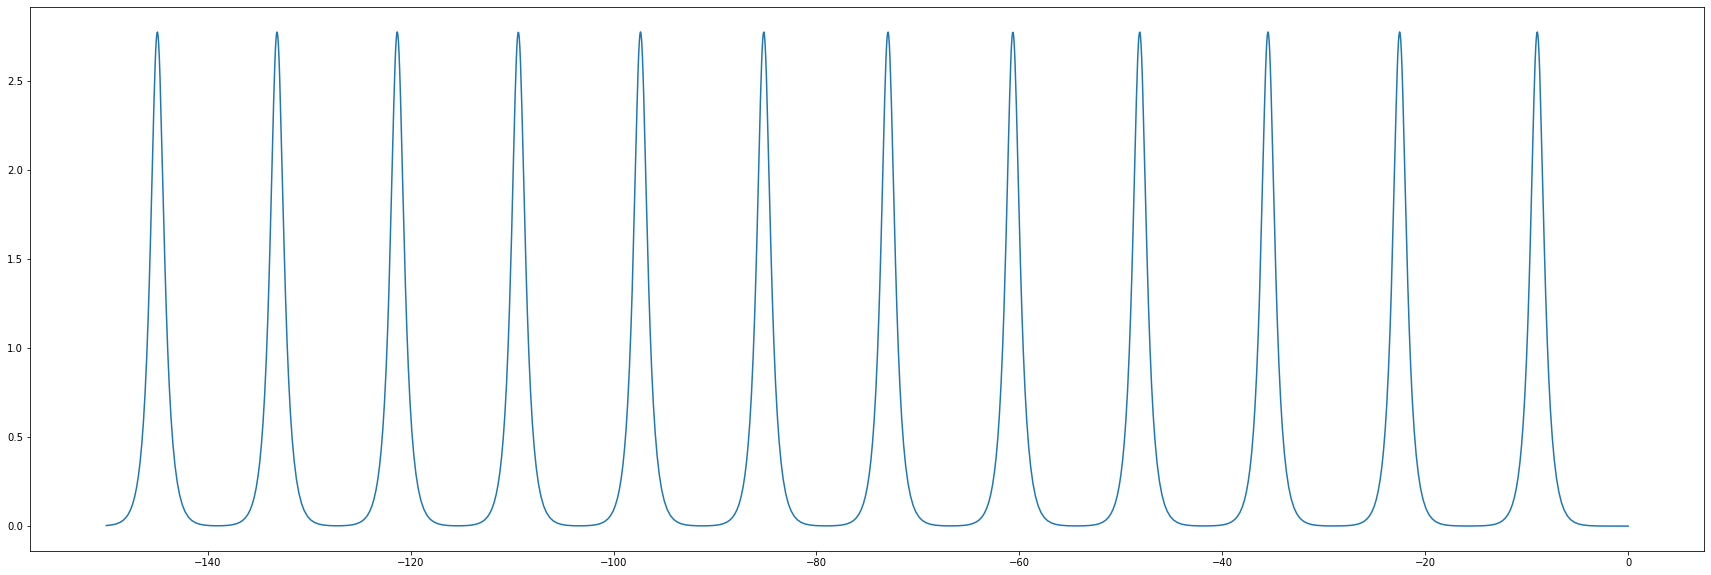

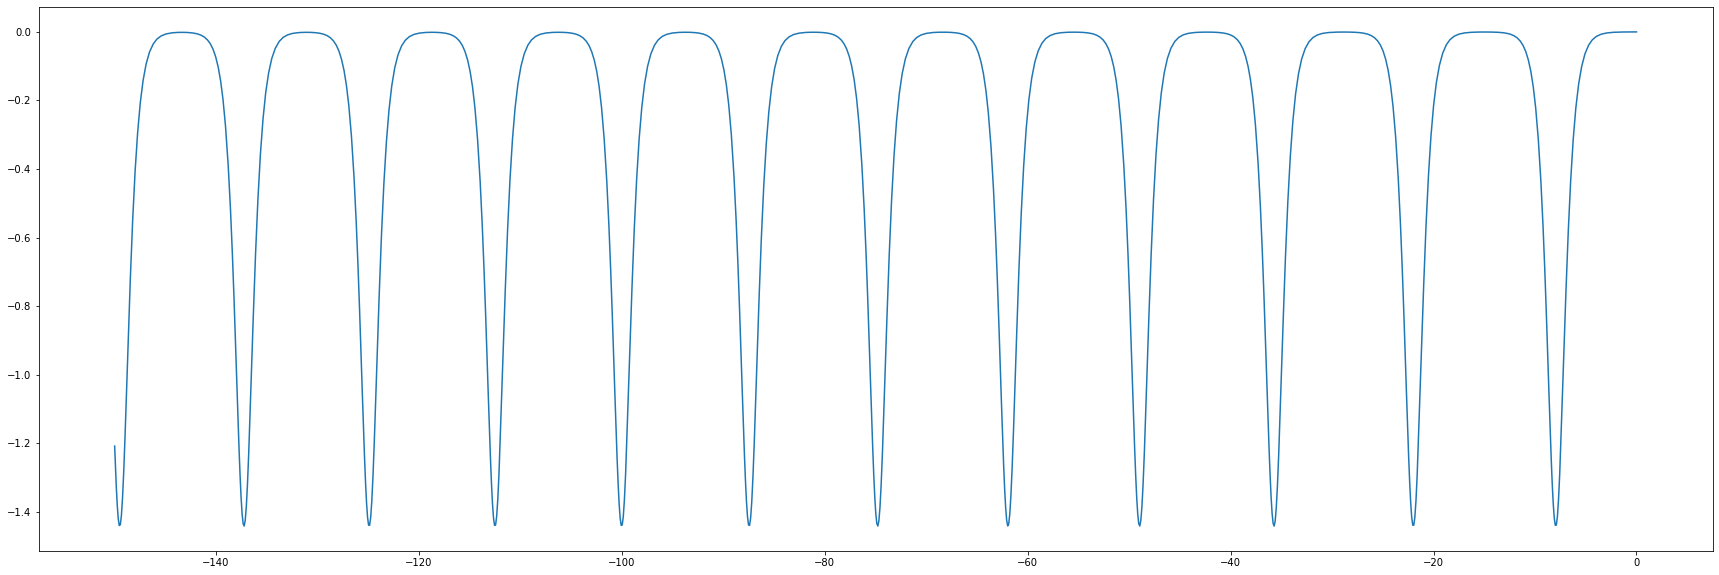

In [232]:
plt.figure(figsize=(30, 10))
for k in range(len(dep0[0])):
    plt.figure(k, figsize=(30, 10))
    x=dep0[1][k]
    t=dep0[0][k]
    plt.plot(t, x)

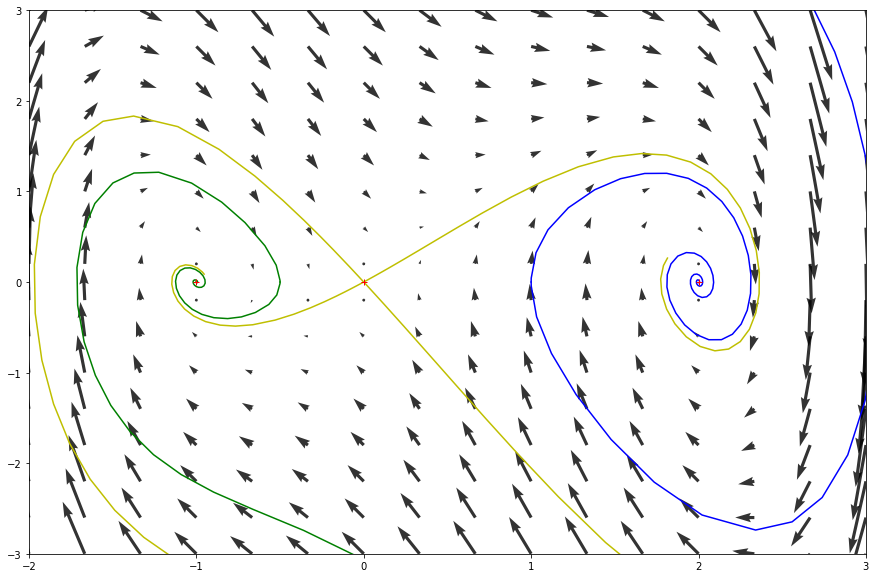

In [46]:
# a > 0
freq=1
rhs=pendula(freq)
pts = []

pts = [(-0.001, 0), (0.001, 0), (-0.5, 0), (1, 0)]
pts.extend(pts)

timespos = np.empty(int(len(pts)/2))
timespos.fill(10)
timesneg = np.empty(int(len(pts)/2))
timesneg.fill(-10)
times = np.concatenate((timespos, timesneg), axis=0)

limits=[(-2.0, 3.0), (-3.0, 3.0)]
dep1 = plotOnPlane(rhs, pts,
             times, 
             limits, ['y-', 'y-', 'g-', 'b-', 'y-', 'y-', 'g-', 'b-'], freq)


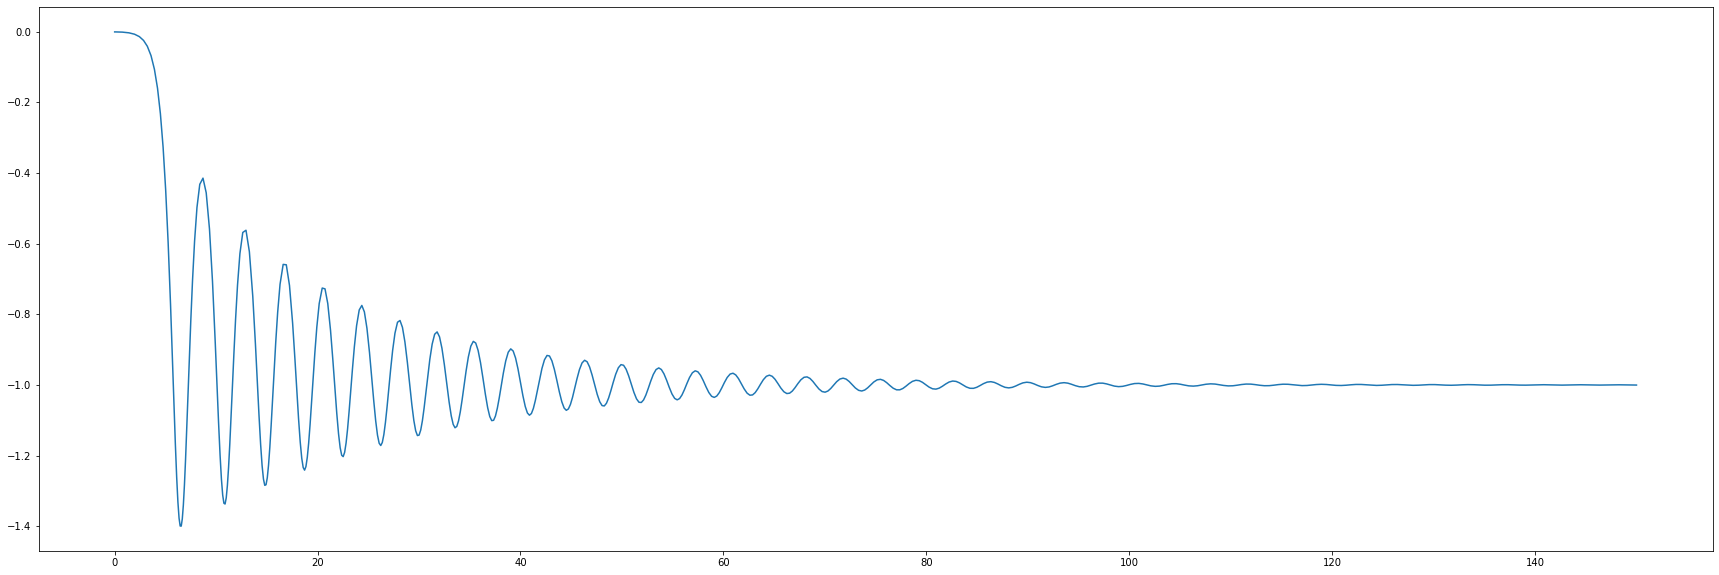

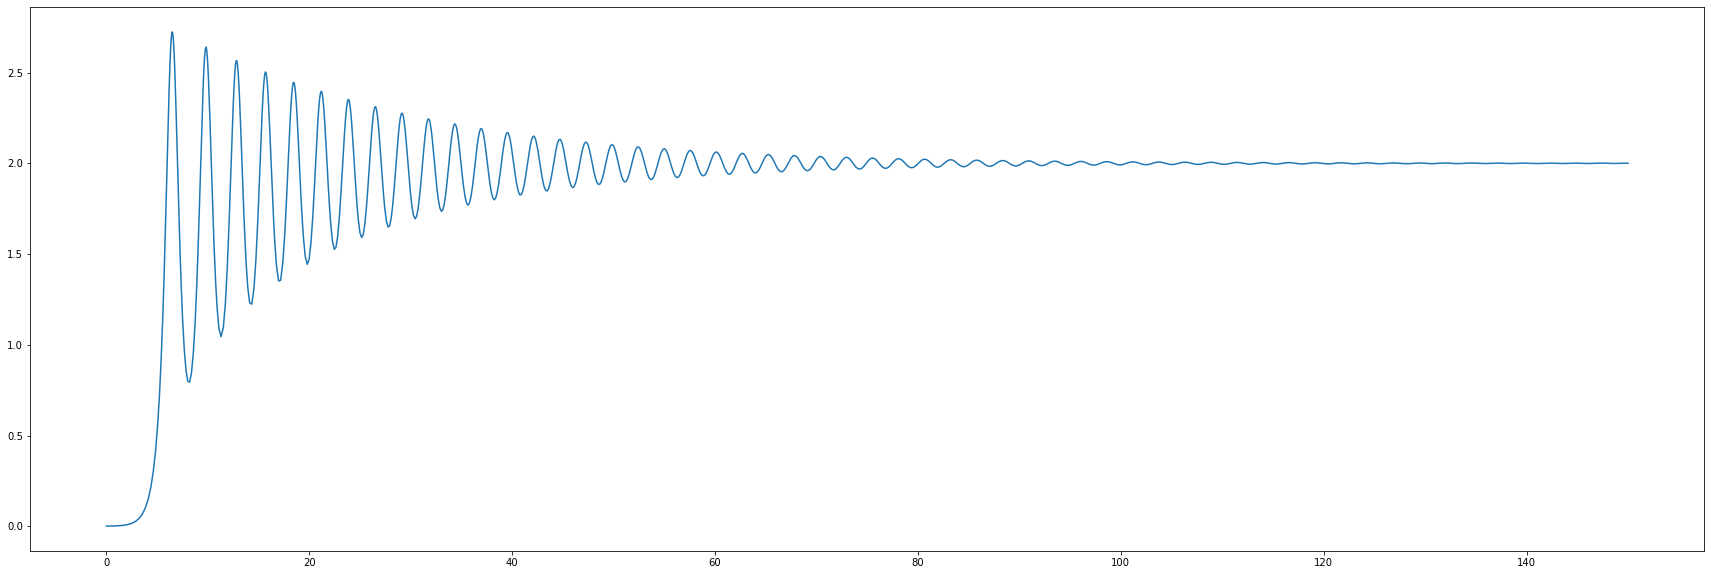

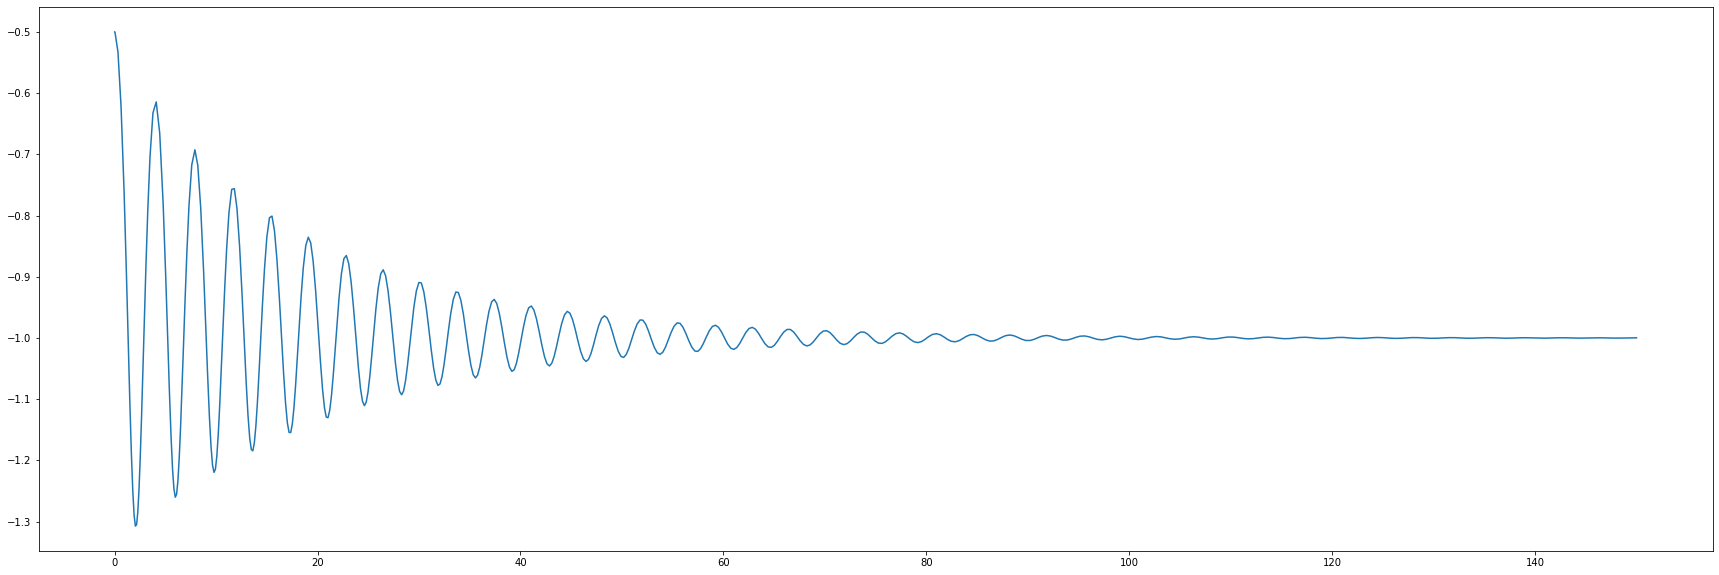

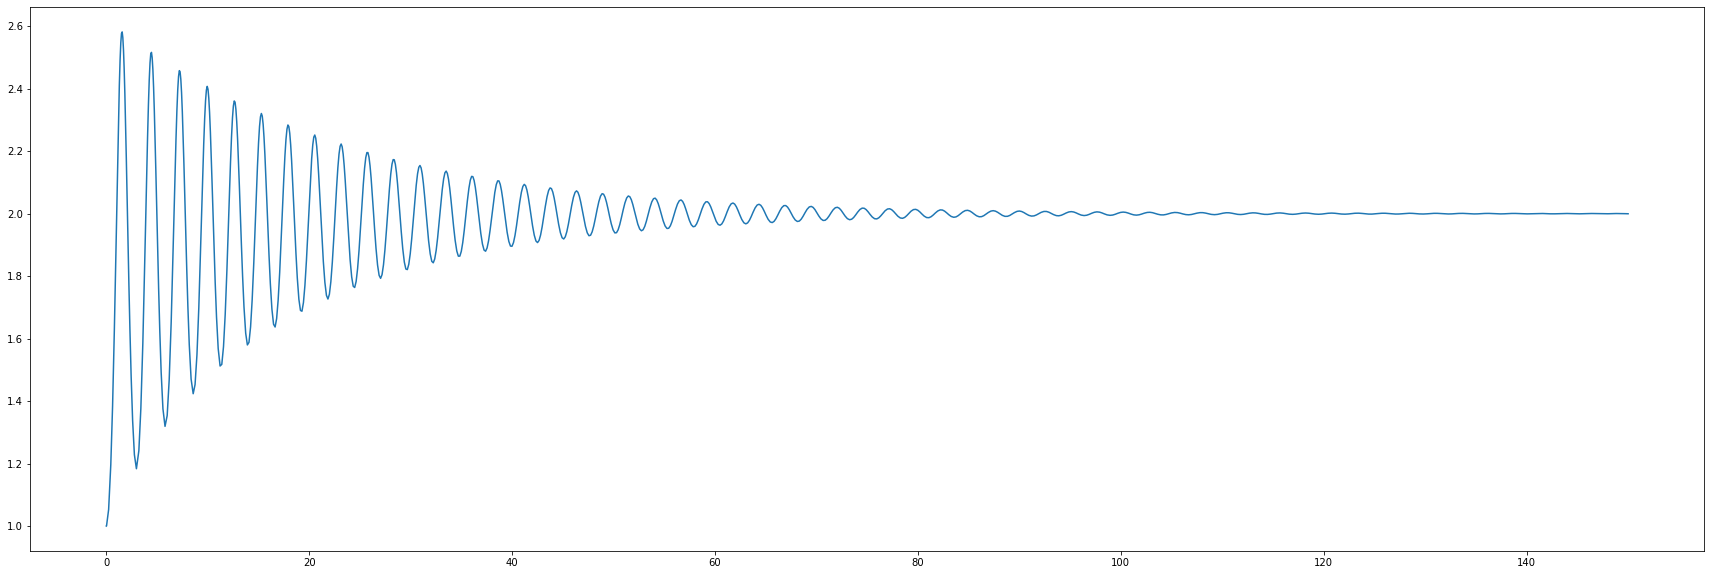

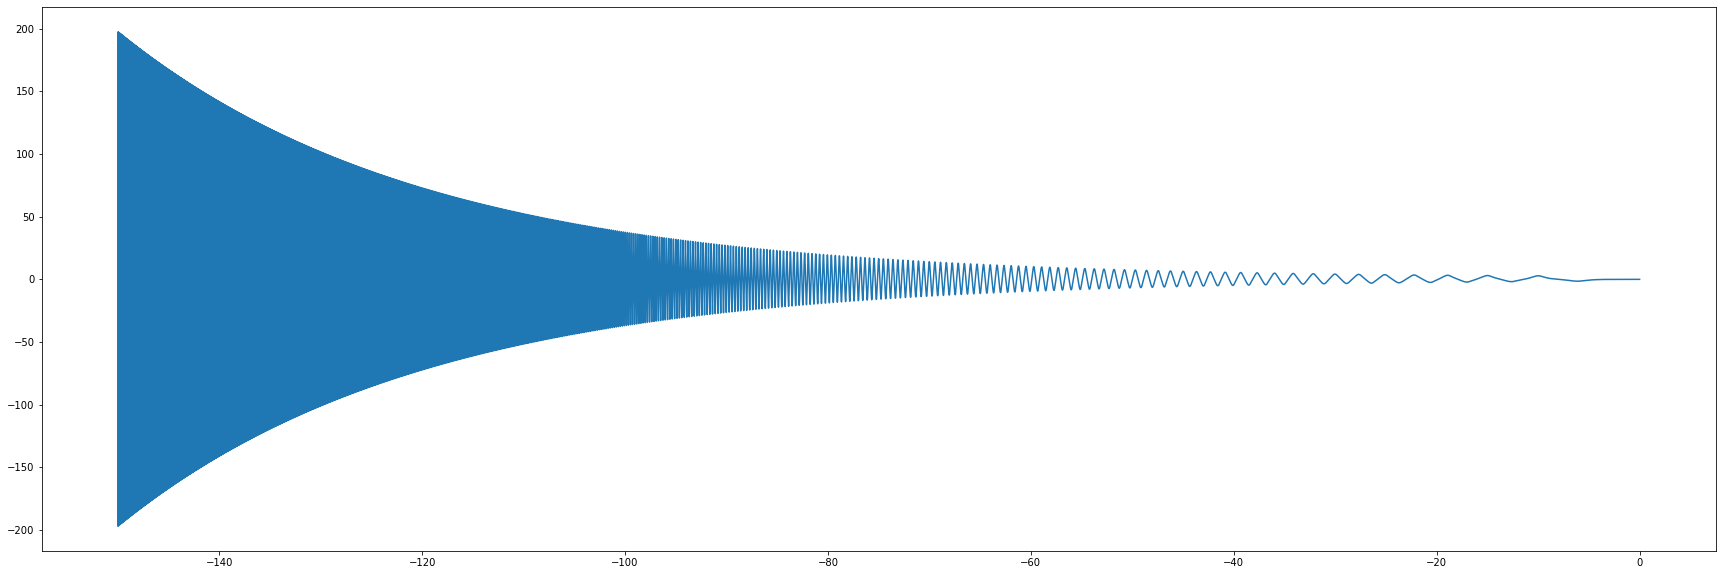

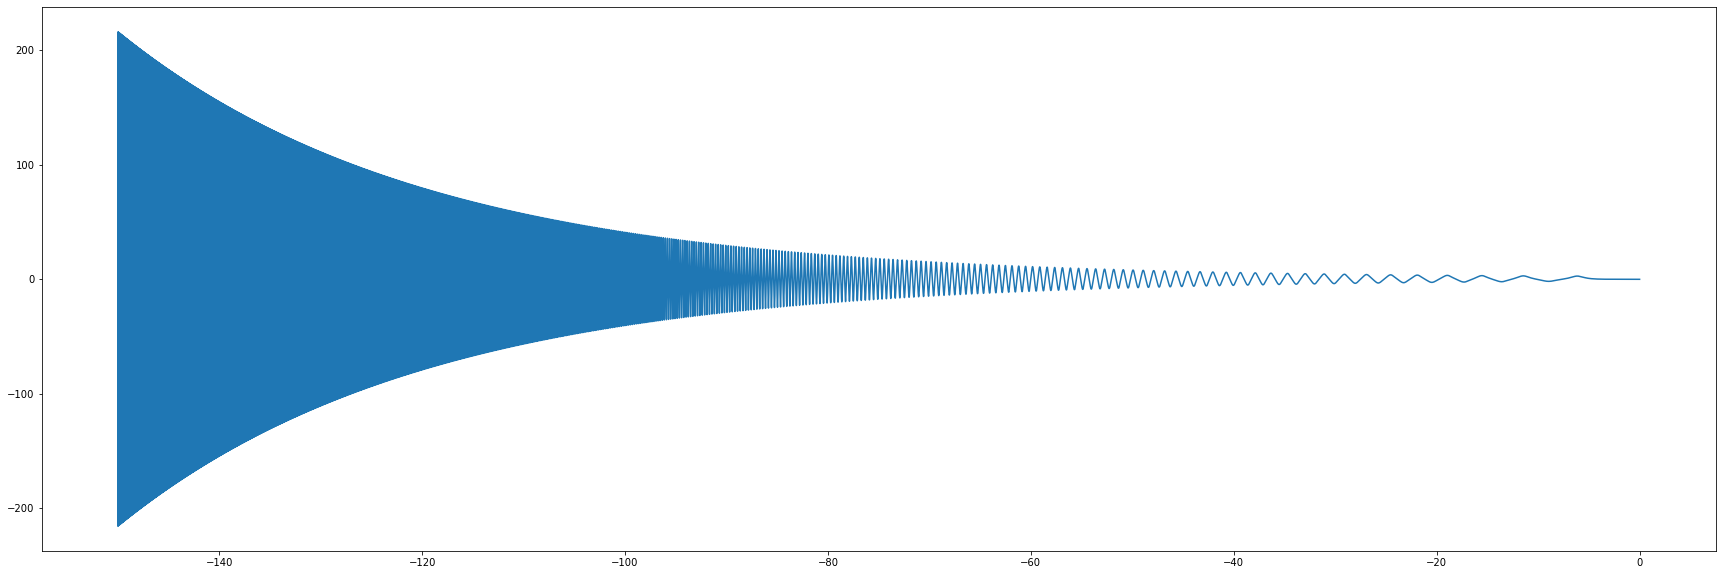

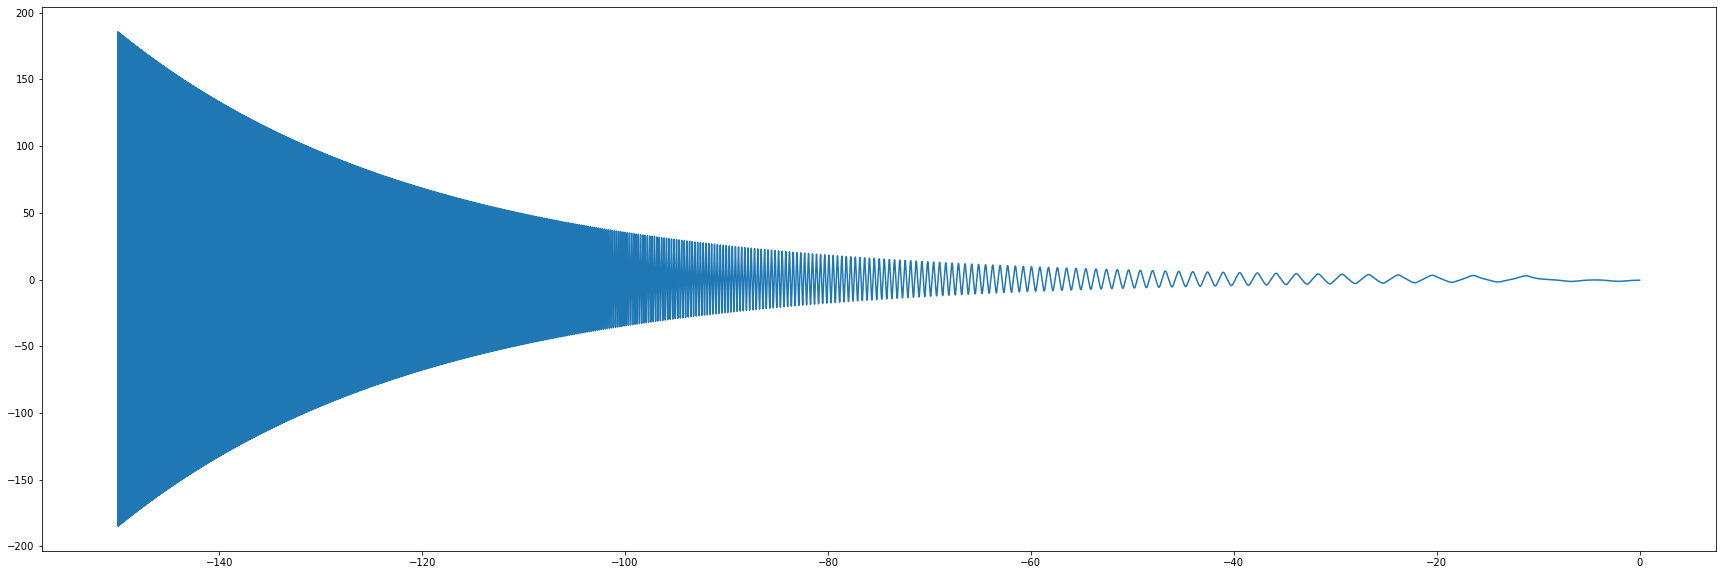

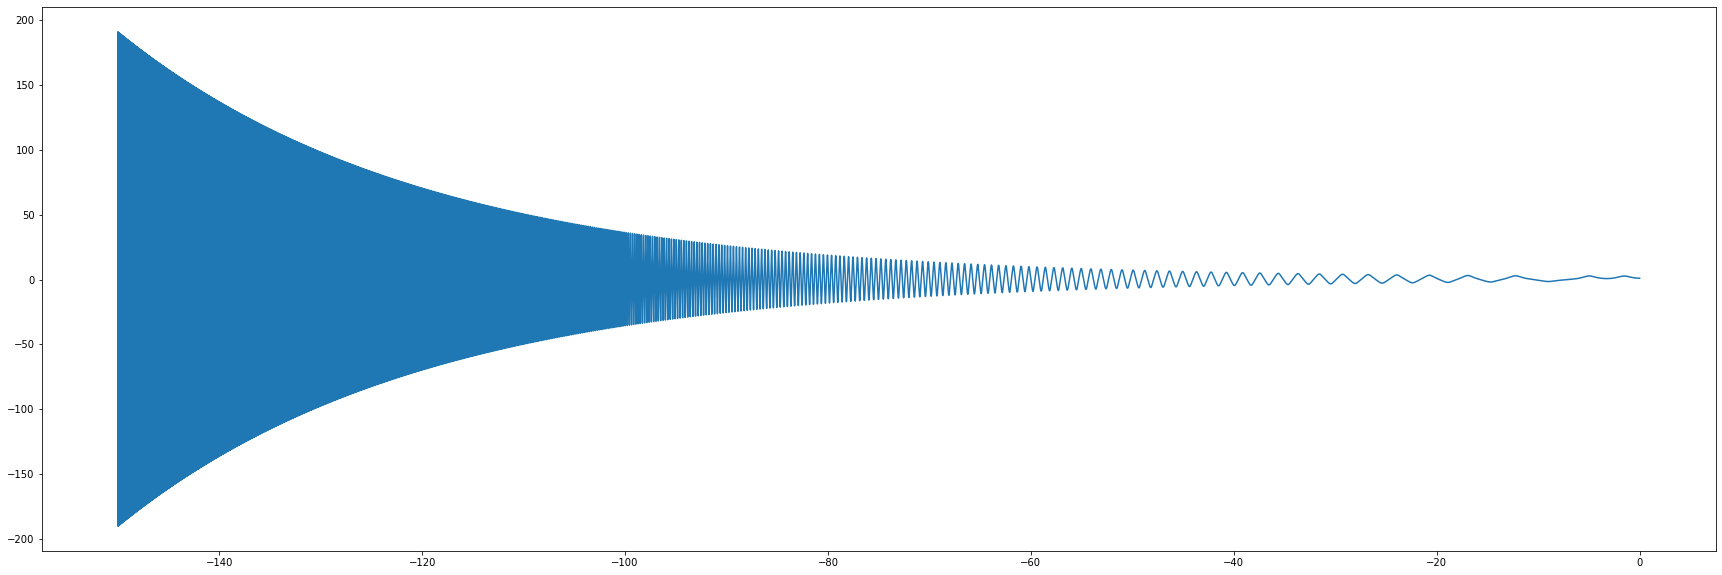

In [240]:
plt.figure(figsize=(30, 10))
for k in range(len(dep1[0])):
    plt.figure(k, figsize=(30, 10))
    x=dep1[1][k]
    t=dep1[0][k]
    plt.plot(t, x)

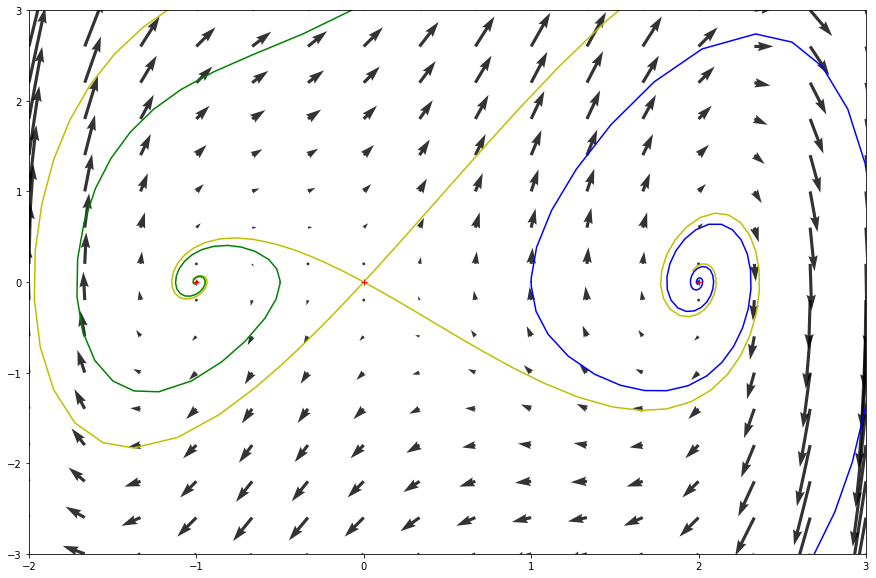

In [59]:
#Фазовый портрет для системы со слабым притоком энергии (b<0):
freq=-1
rhs=pendula(freq)
pts = []

# for i, j in enumerate(range(0, 20)):
#     pts.append((i/4-2, 0))
pts = [(-0.001, 0), (0.001, 0), (-0.5, 0), (1, 0)]
pts.extend(pts)

timespos = np.empty(int(len(pts)/2))
timespos.fill(12)
timesneg = np.empty(int(len(pts)/2))
timesneg.fill(-12)
times = np.concatenate((timespos, timesneg), axis=0)

limits=[(-2.0, 3.0), (-3.0, 3.0)]
dep2 = plotOnPlane(rhs, pts,
             times, 
             limits, ['y-', 'y-', 'g-', 'b-', 'y-', 'y-', 'g-', 'b-'], freq)

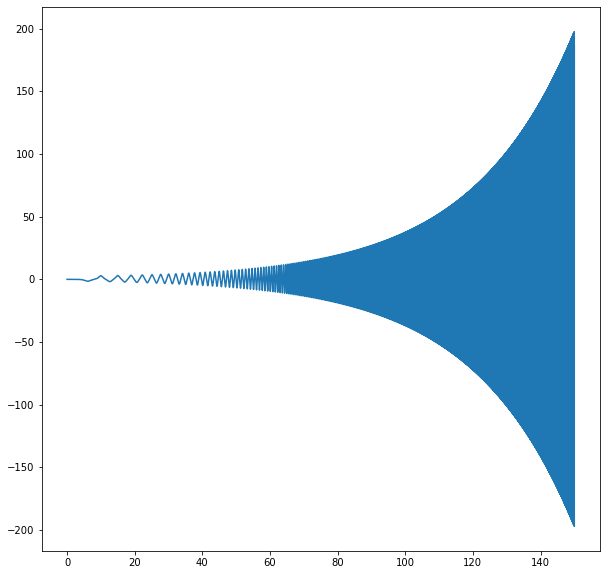

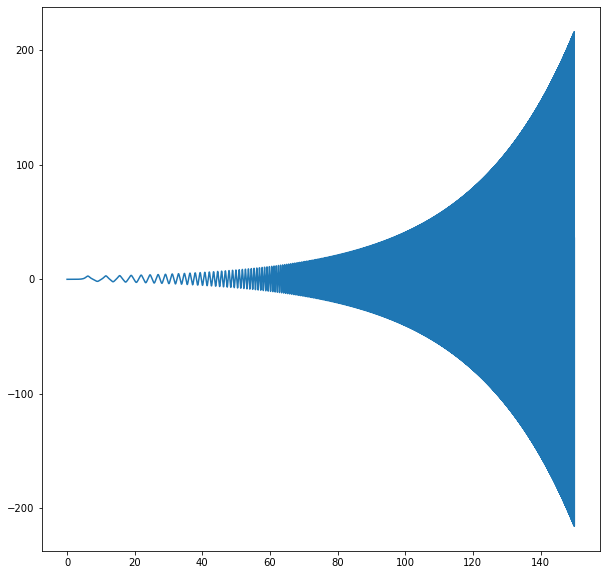

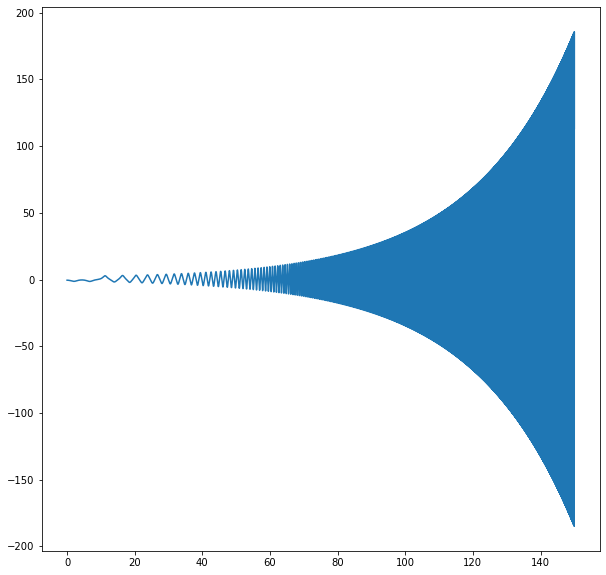

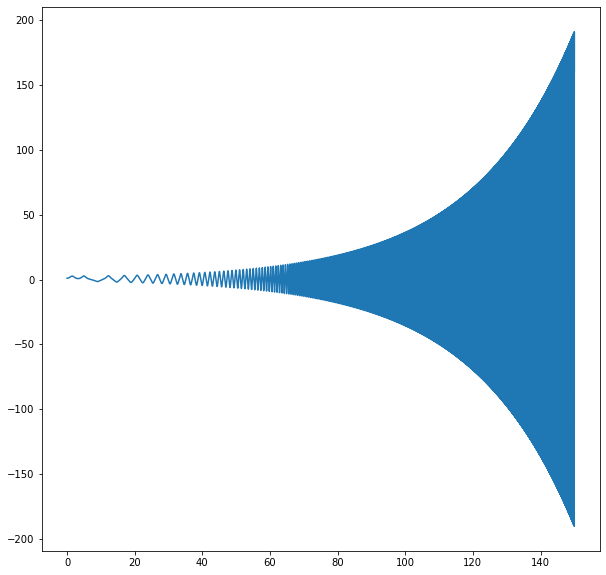

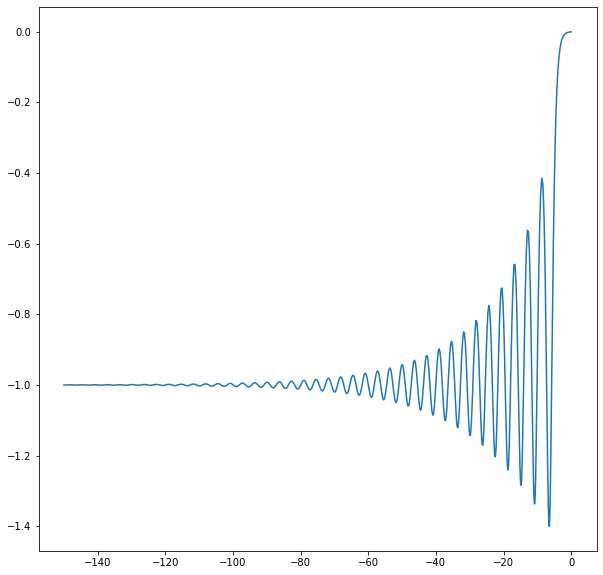

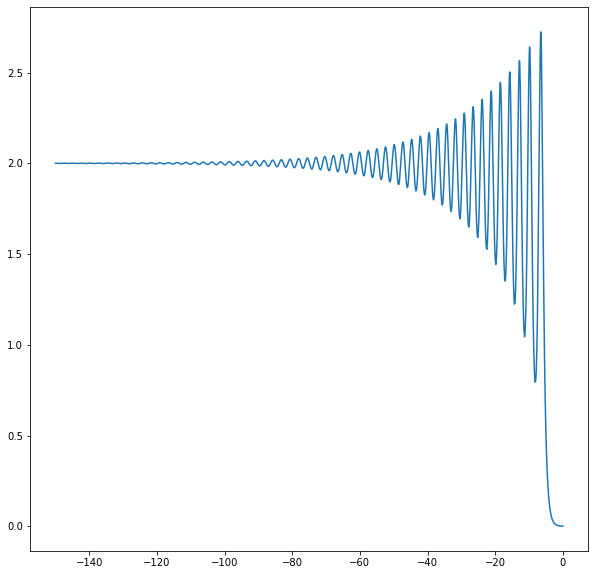

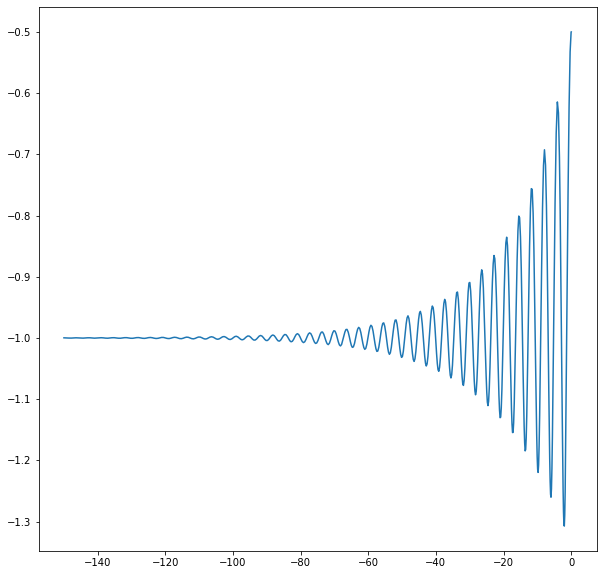

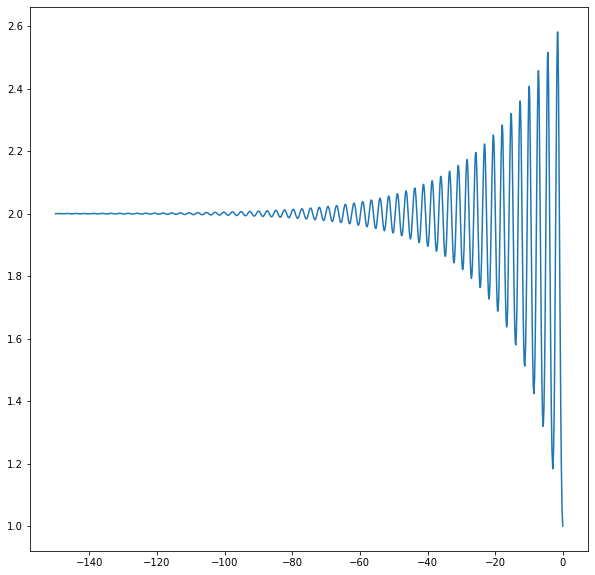

In [241]:
plt.figure(figsize=(10, 10))
for k in range(len(dep2[0])):
    plt.figure(k, figsize=(10, 10))
    x=dep2[1][k]
    t=dep2[0][k]
    plt.plot(t, x)

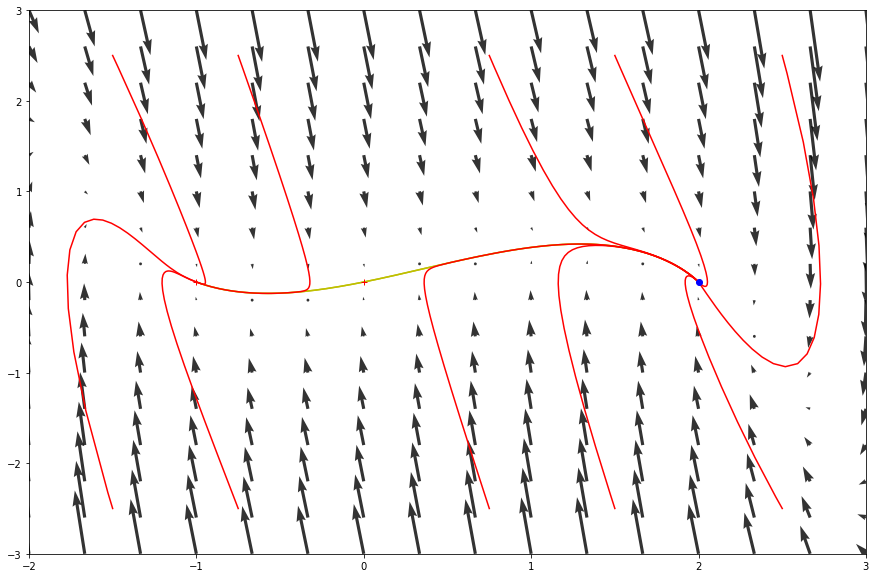

In [29]:
#Фазовый портрет для системы с сильным трением (c>>0)
# , (0.001, 0), (-0.5, 0), (1, 0)
# , 'g-', 'b-', 'y-', 'y-', 'g-', 'b-'
freq=5
rhs=pendula(freq)
pts = []

# for i, j in enumerate(range(0, 20)):
#     pts.append((i/4-2, 0))
pts = [seps(0, 0, freq)[0], seps(0, 0, freq)[1], seps(0, 0, freq)[2], seps(0, 0, freq)[3], (2.5, -2.5), (1.5, -2.5), (0.75, -2.5), (2.5, 2.5), (1.5, 2.5), (0.75, 2.5),
      (-1.5, -2.5), (-0.75, -2.5), (-1.5, 2.5), (-0.75, 2.5)]
# pts.extend(pts)

timespos = np.empty(int(len(pts)/2))
timespos.fill(150)
timesneg=[]
# timesneg = np.empty(int(len(pts)/2))
# timesneg.fill(-150)
times = np.concatenate((timespos, timesneg), axis=0)
times = [150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150]

limits=[(-2.0, 3.0), (-3.0, 3.0)]
dep3 = plotOnPlane(rhs, pts,
             times, 
             limits, ['y-', 'y-', 'y-', 'y-', 'r-', 'r-', 'r-', 'r-', 'r-', 'r-', 'r-', 'r-', 'r-', 'r-'], a)

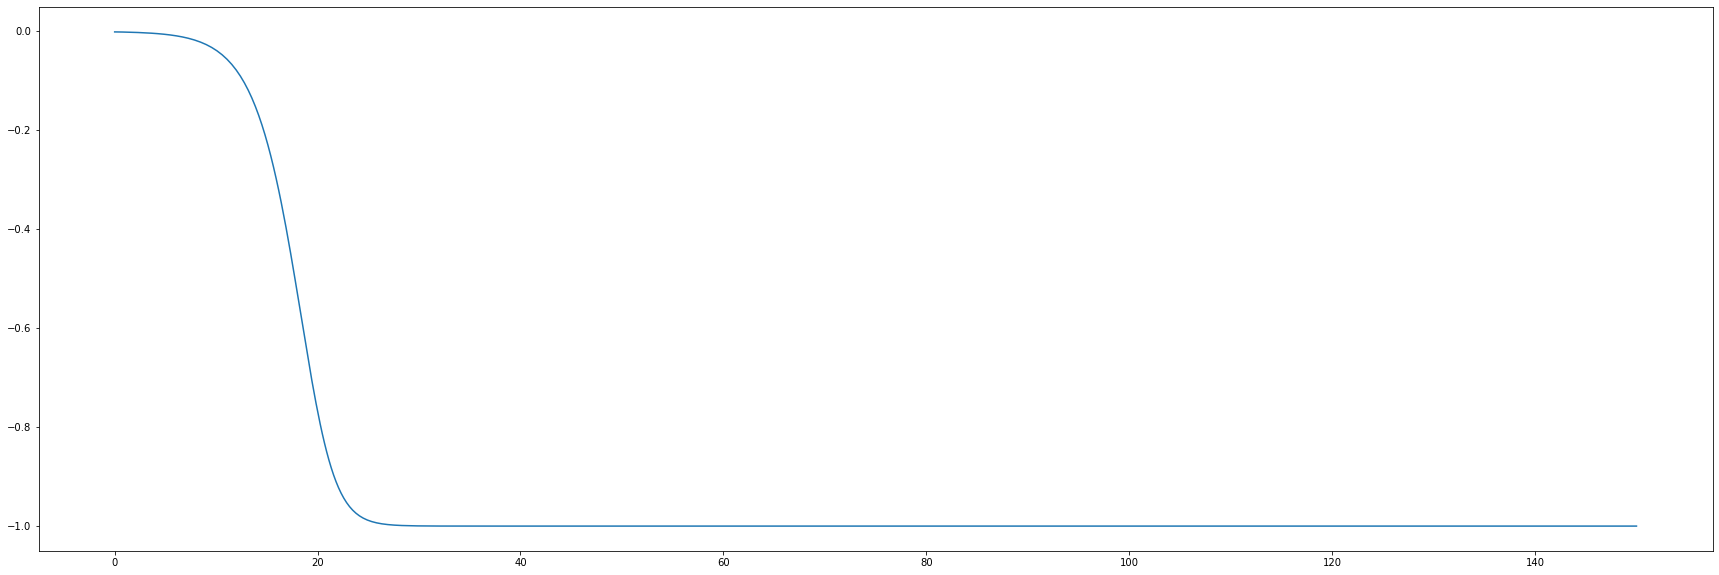

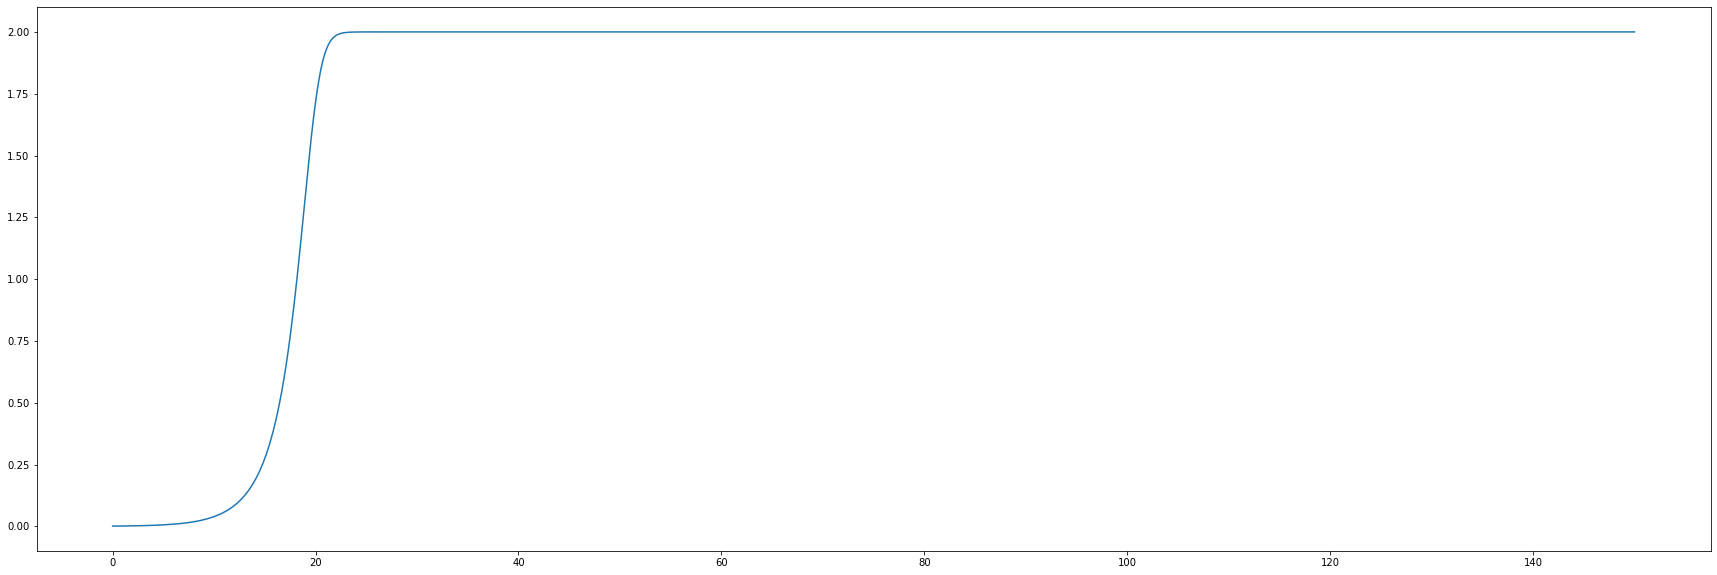

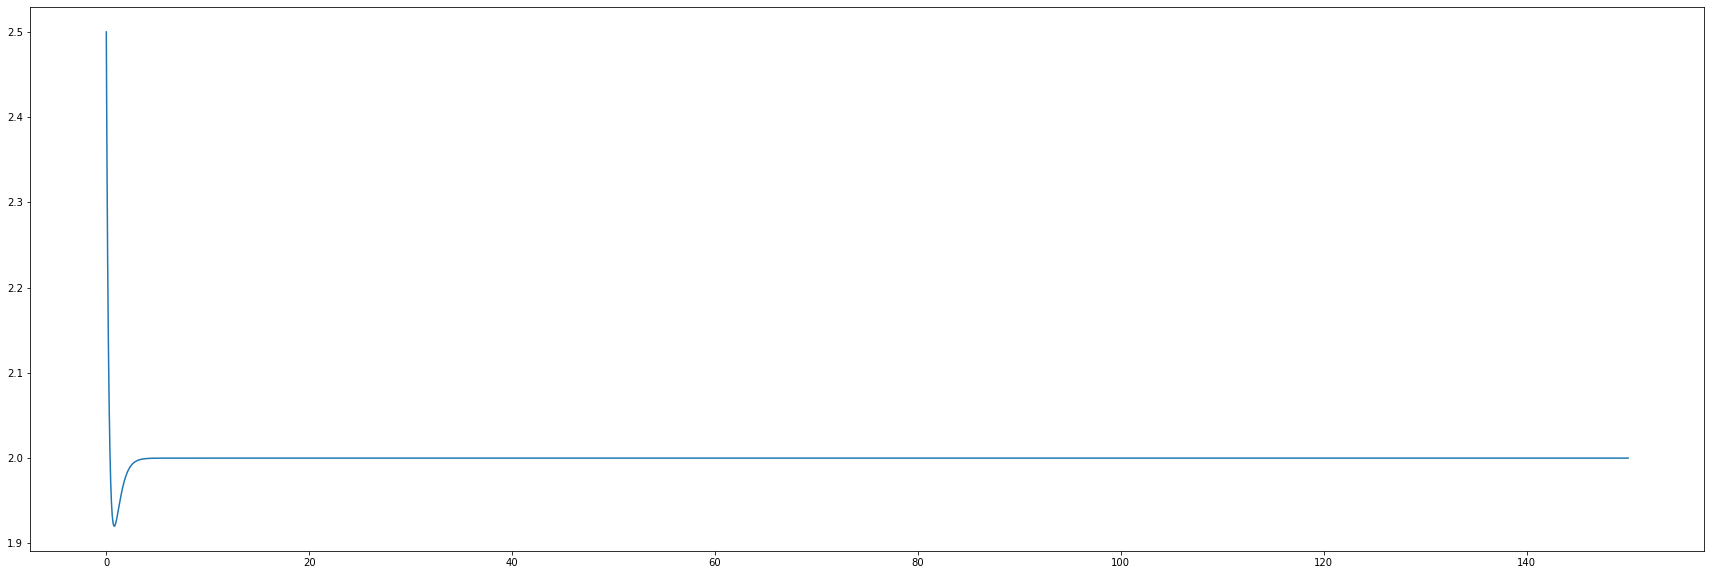

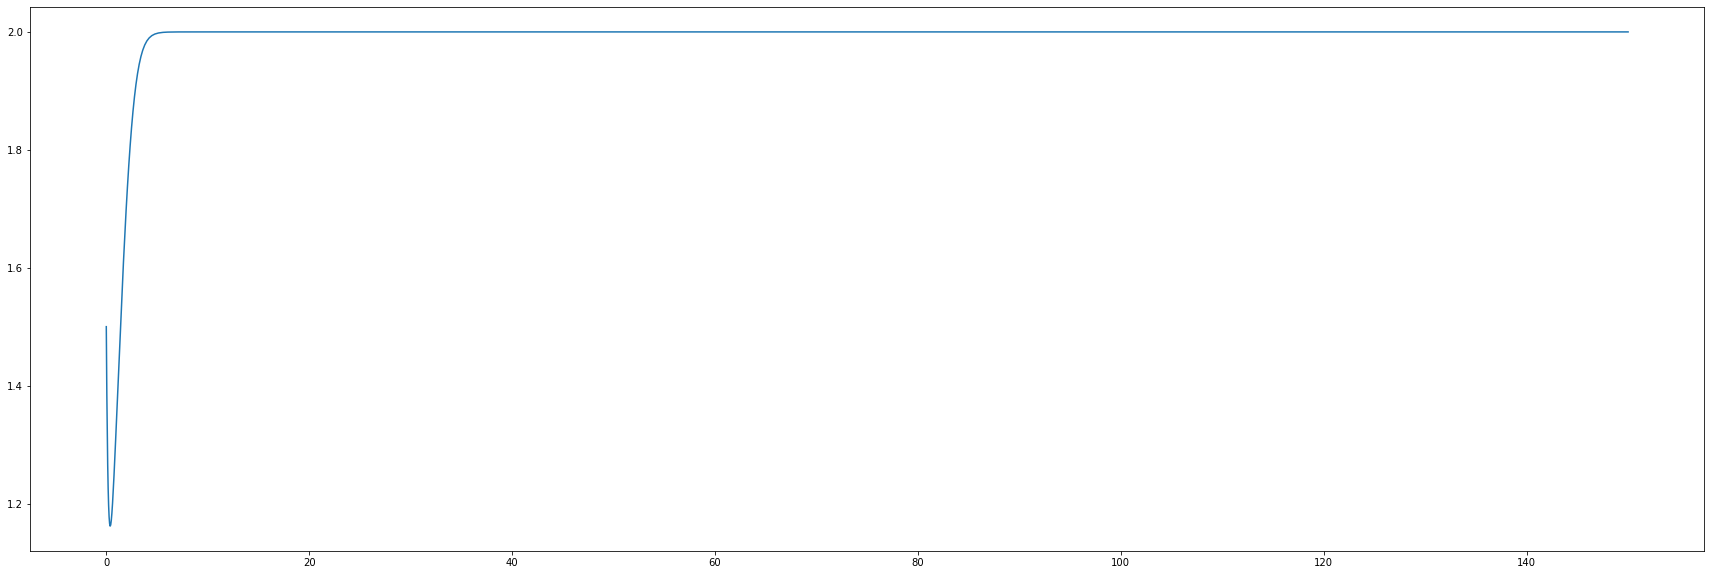

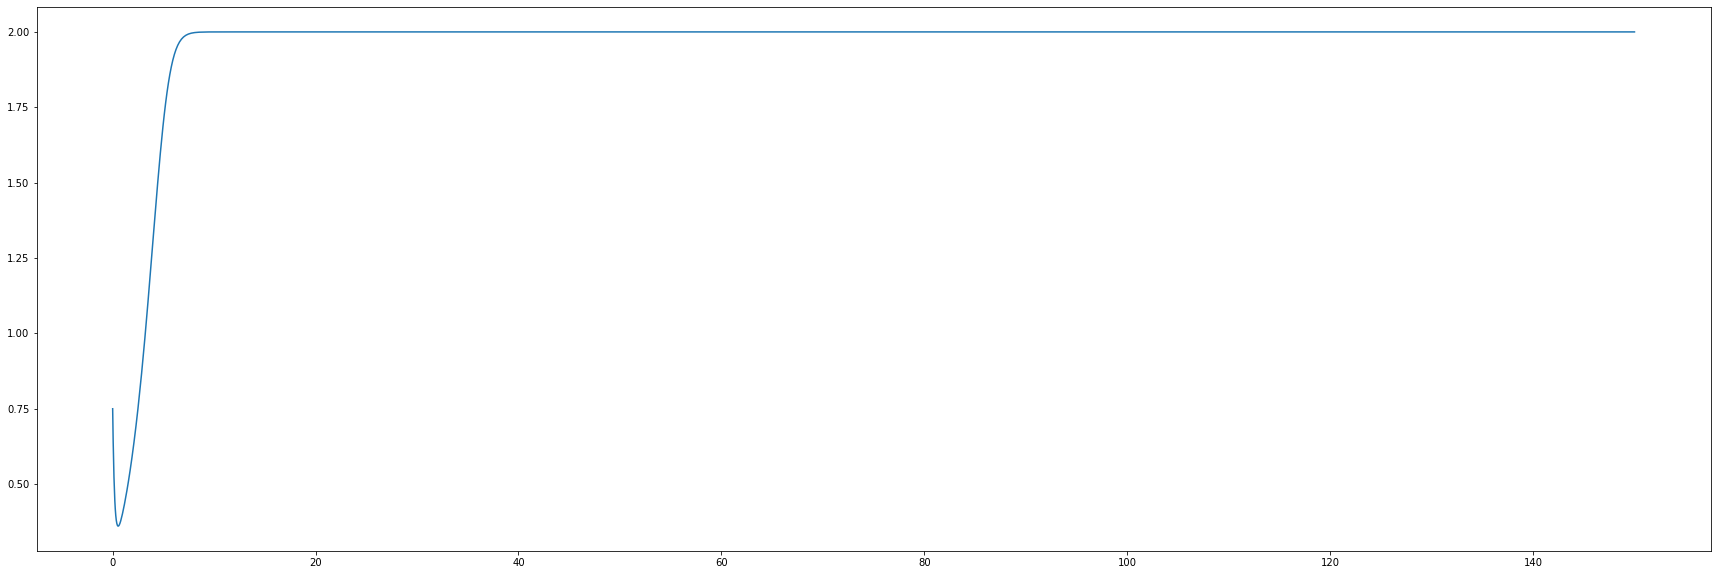

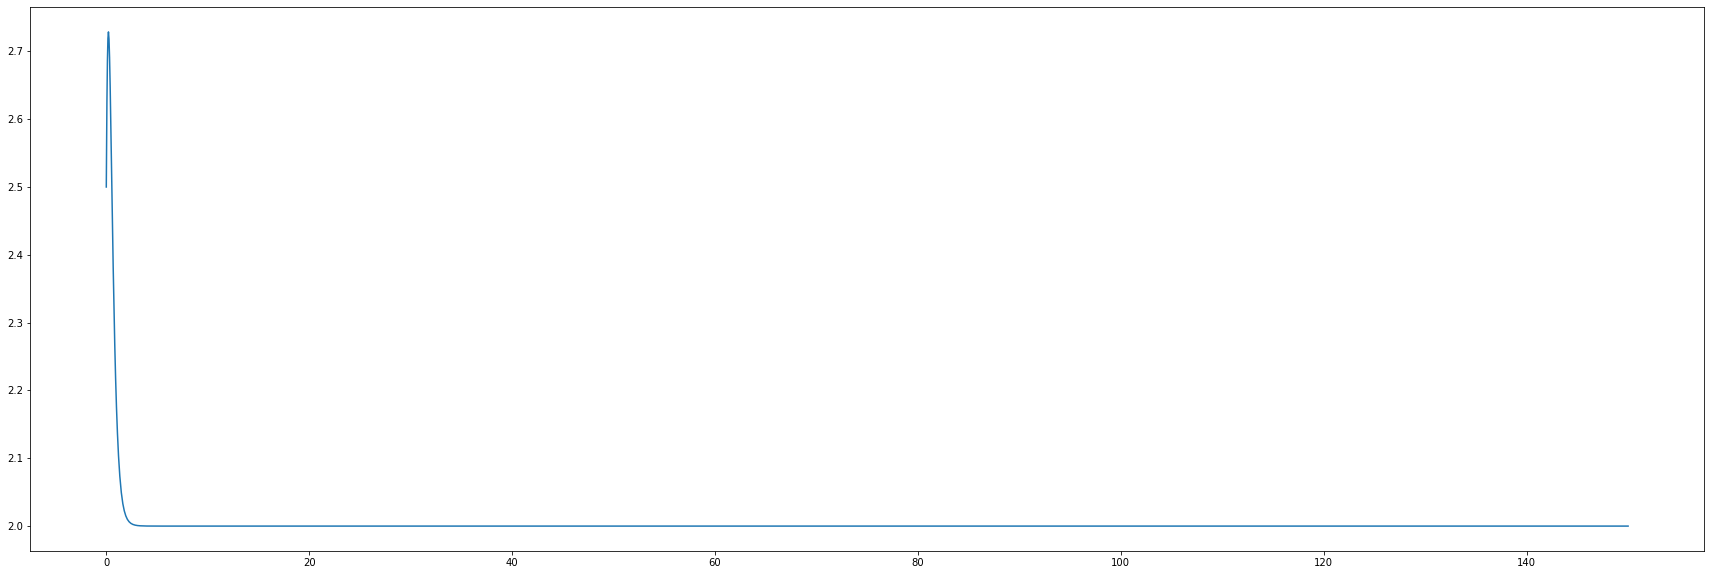

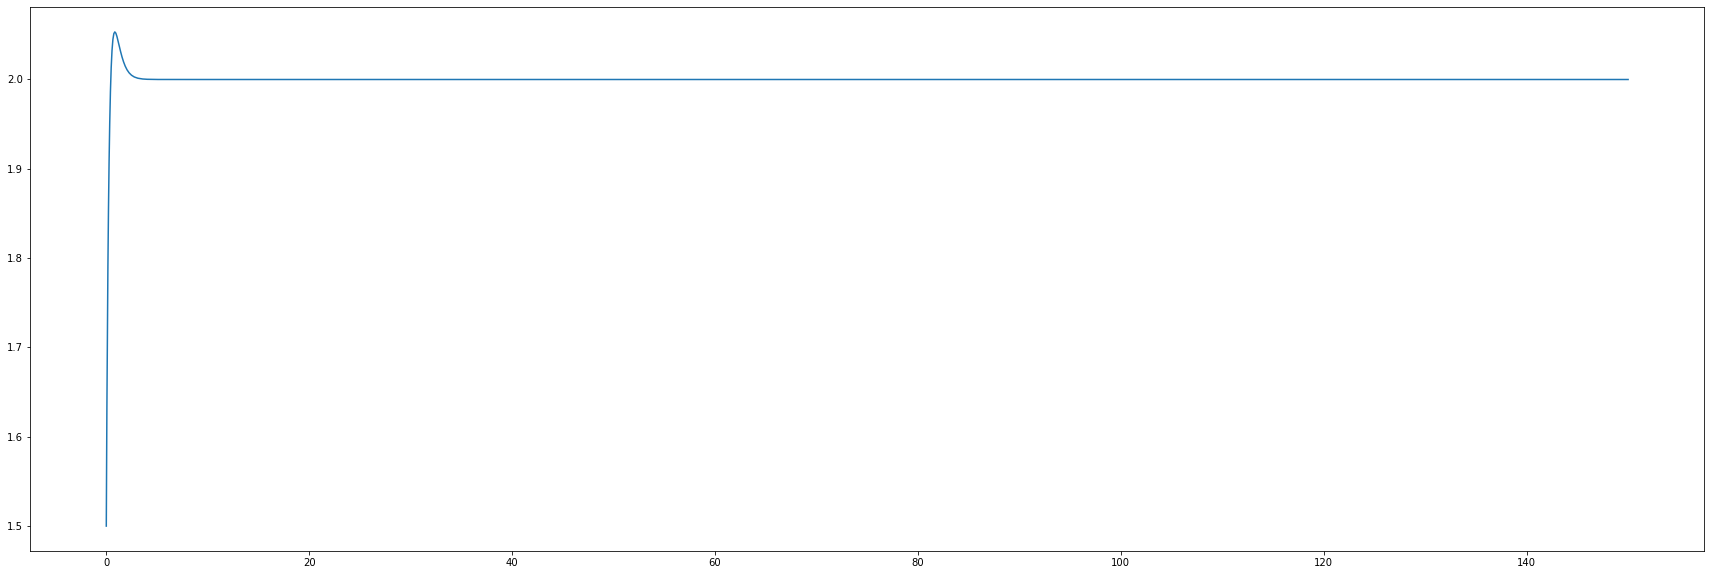

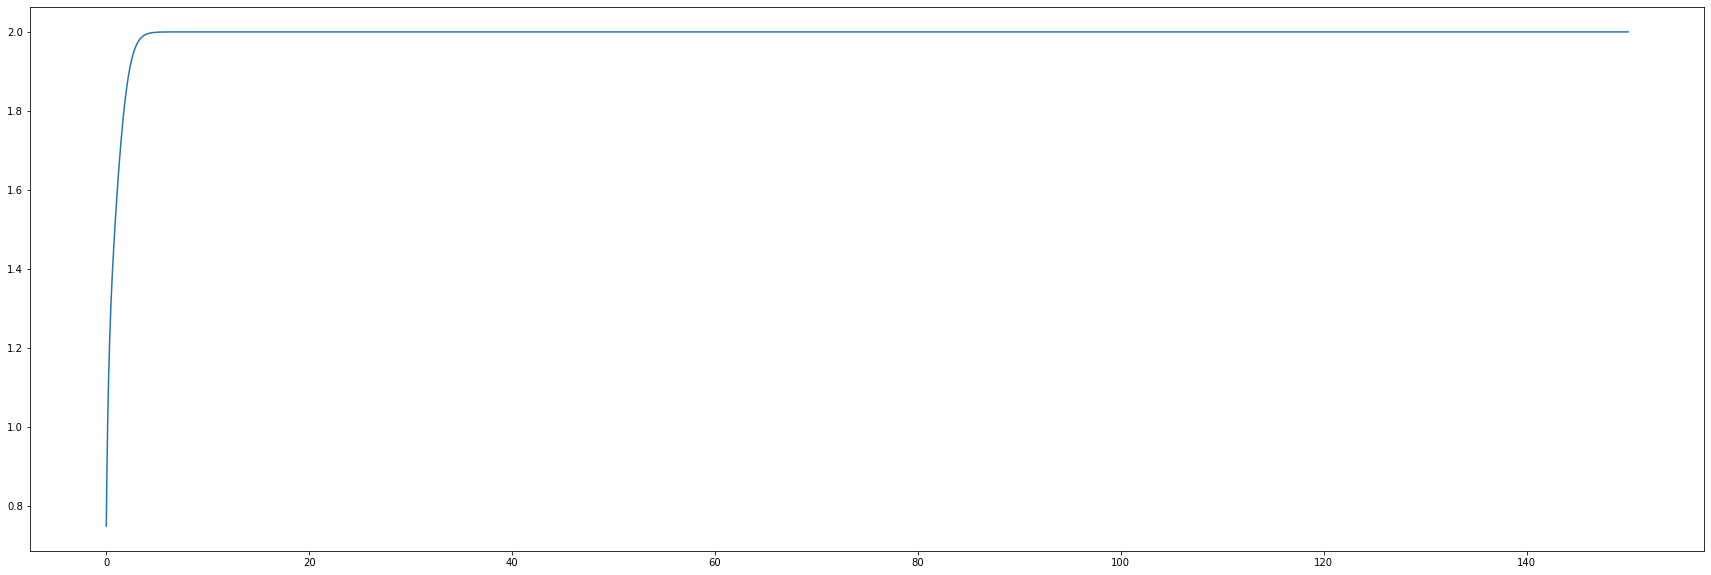

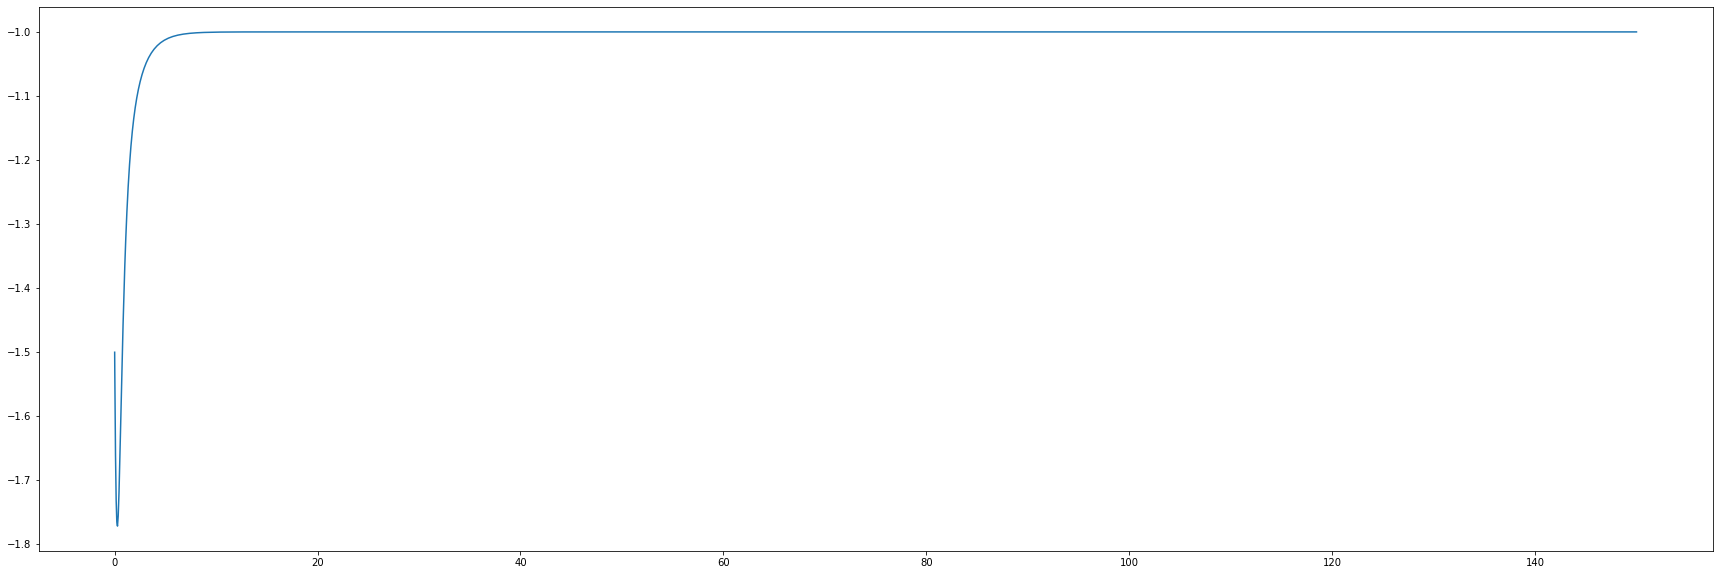

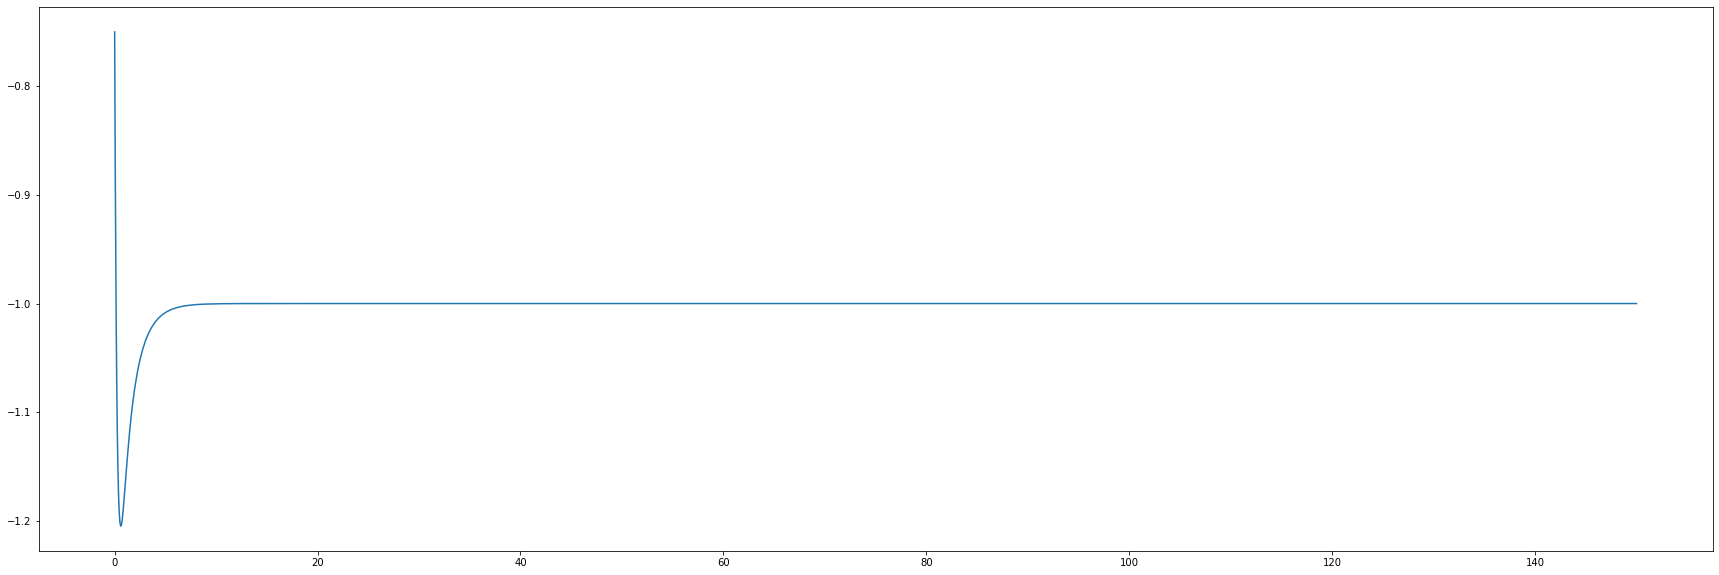

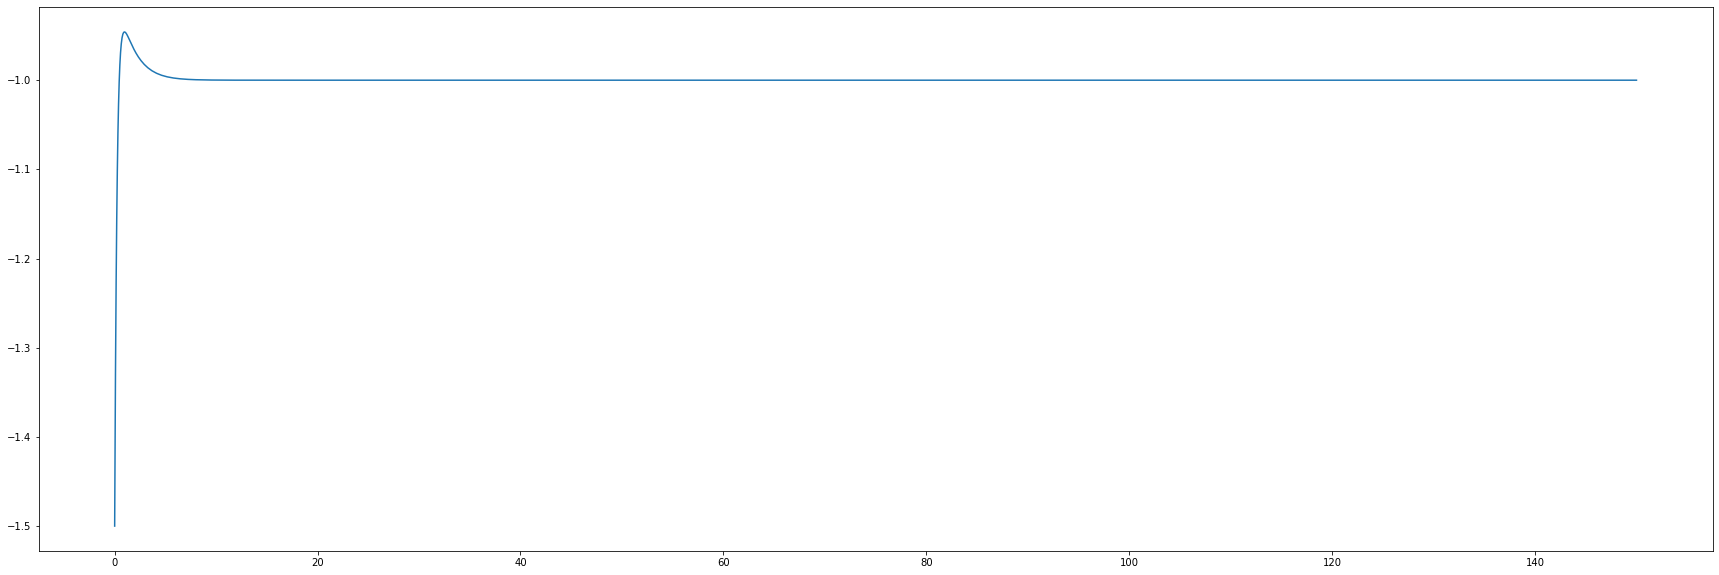

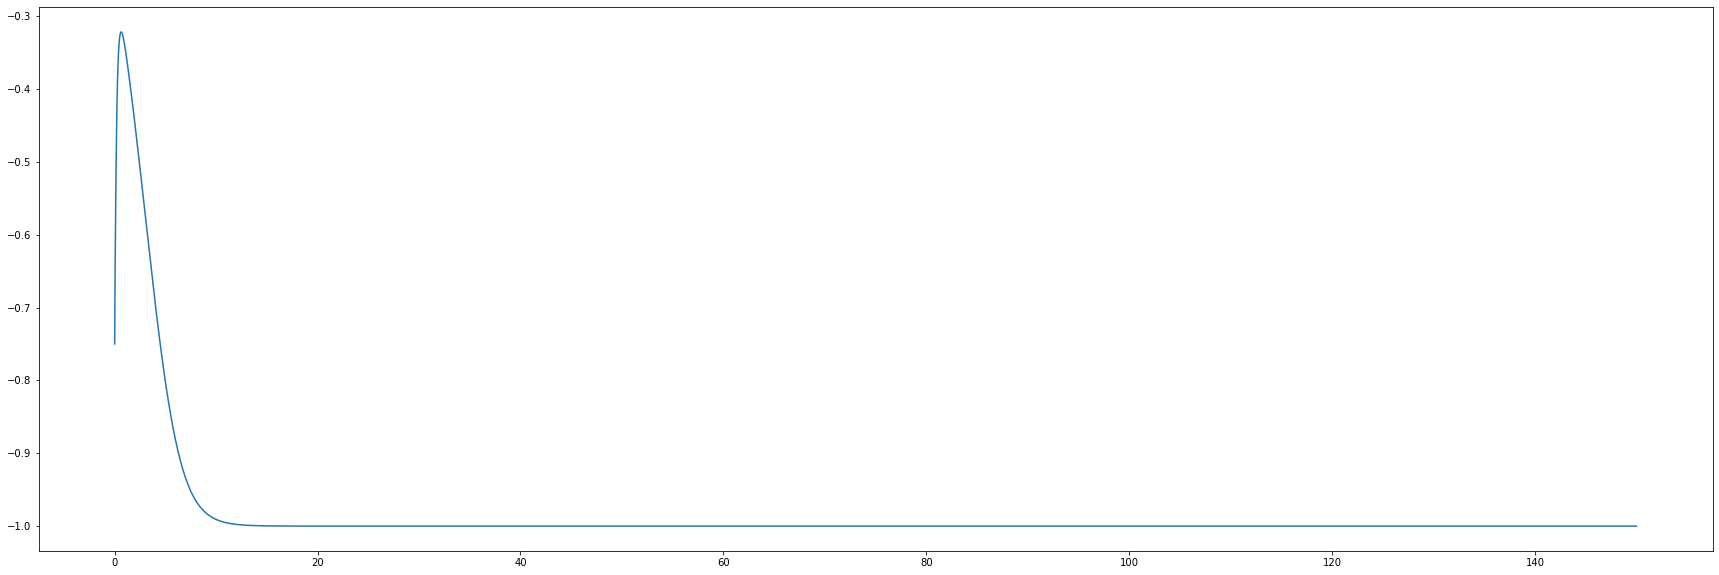

In [315]:
plt.figure(figsize=(30, 10))
for k in range(len(dep3[0])):
    plt.figure(k, figsize=(30, 10))
    x=dep3[1][k]
    t=dep3[0][k]
    plt.plot(t, x)

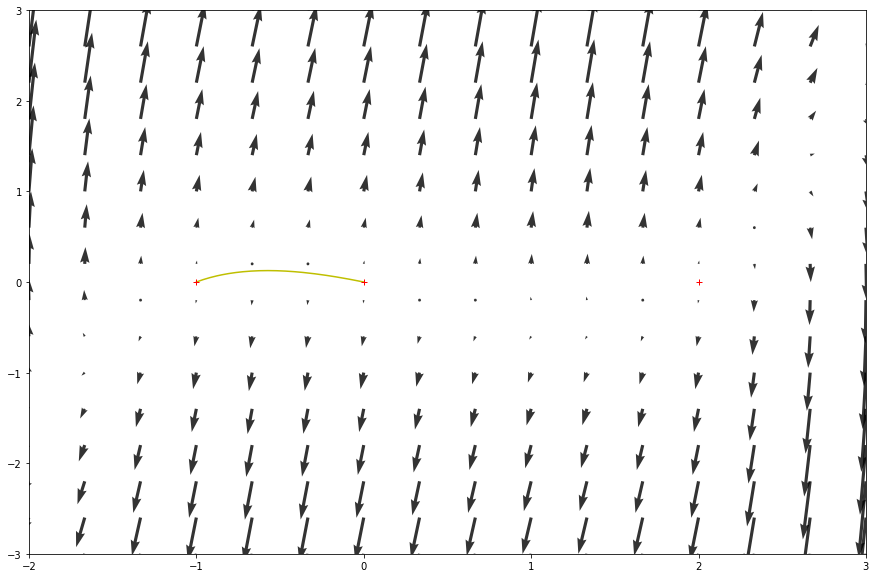

In [56]:
#Фазовый портрет для системы с сильным притоком энергии (d<<0)
# , (0.001, 0), (2.5, -2.5), (1.5, -2.5), (0.75, -2.5), (2.5, 2.5), (1.5, 2.5), (0.75, 2.5),
#       (-1.5, -2.5), (-0.75, -2.5), (-1.5, 2.5), (-0.75, 2.5)
# , 'y-', 'r-', 'r-', 'r-', 'r-', 'r-', 'r-', 'r-', 'r-', 'r-', 'r-'
freq=-5
rhs=pendula(freq)
pts = []

# for i, j in enumerate(range(0, 20)):
#     pts.append((i/4-2, 0))
pts = [(seps(0, 0, -5))[0]]
# pts.extend(pts)

timespos = np.empty(int(len(pts)/2))
timespos.fill(-10)
timesneg=[]
# timesneg = np.empty(int(len(pts)/2))
# timesneg.fill(-150)
times = np.concatenate((timespos, timesneg), axis=0)
times = [-150]

limits=[(-2.0, 3.0), (-3.0, 3.0)]
dep4 = plotOnPlane(rhs, pts,
             times, 
             limits, ['y-'], freq)

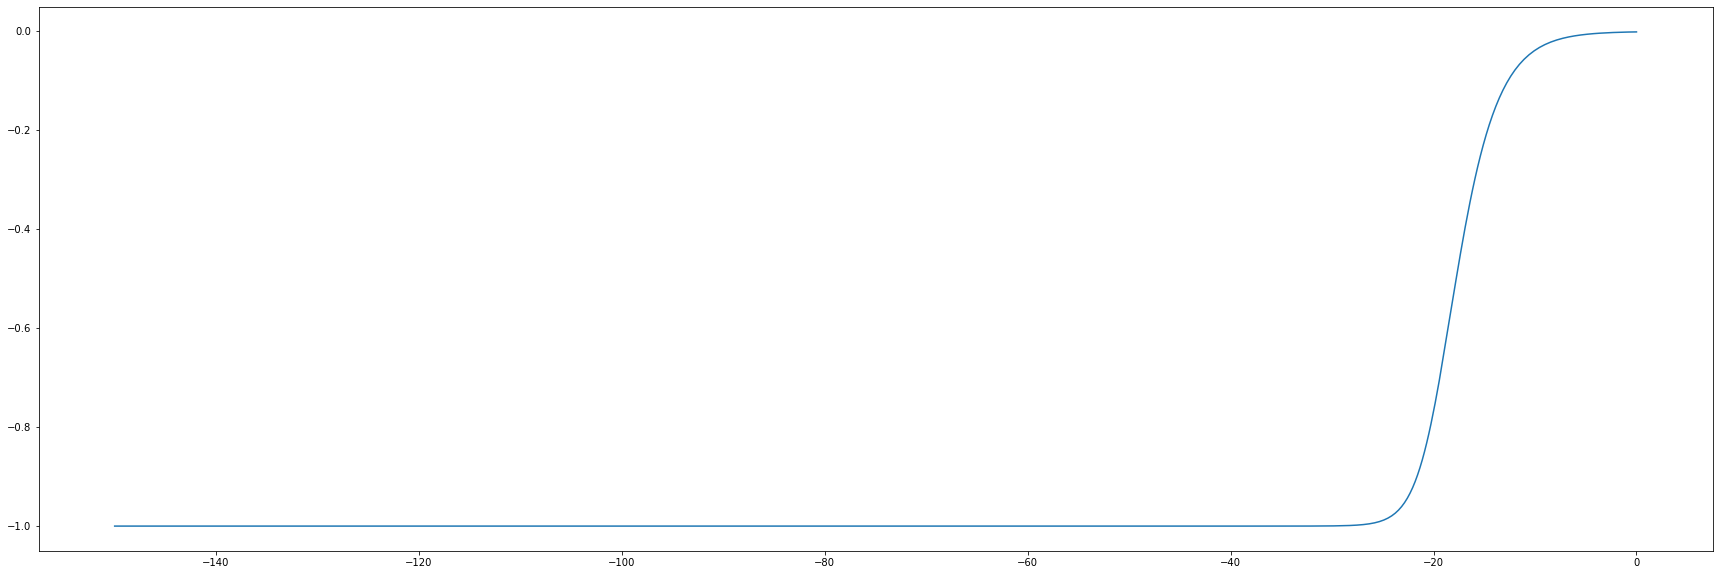

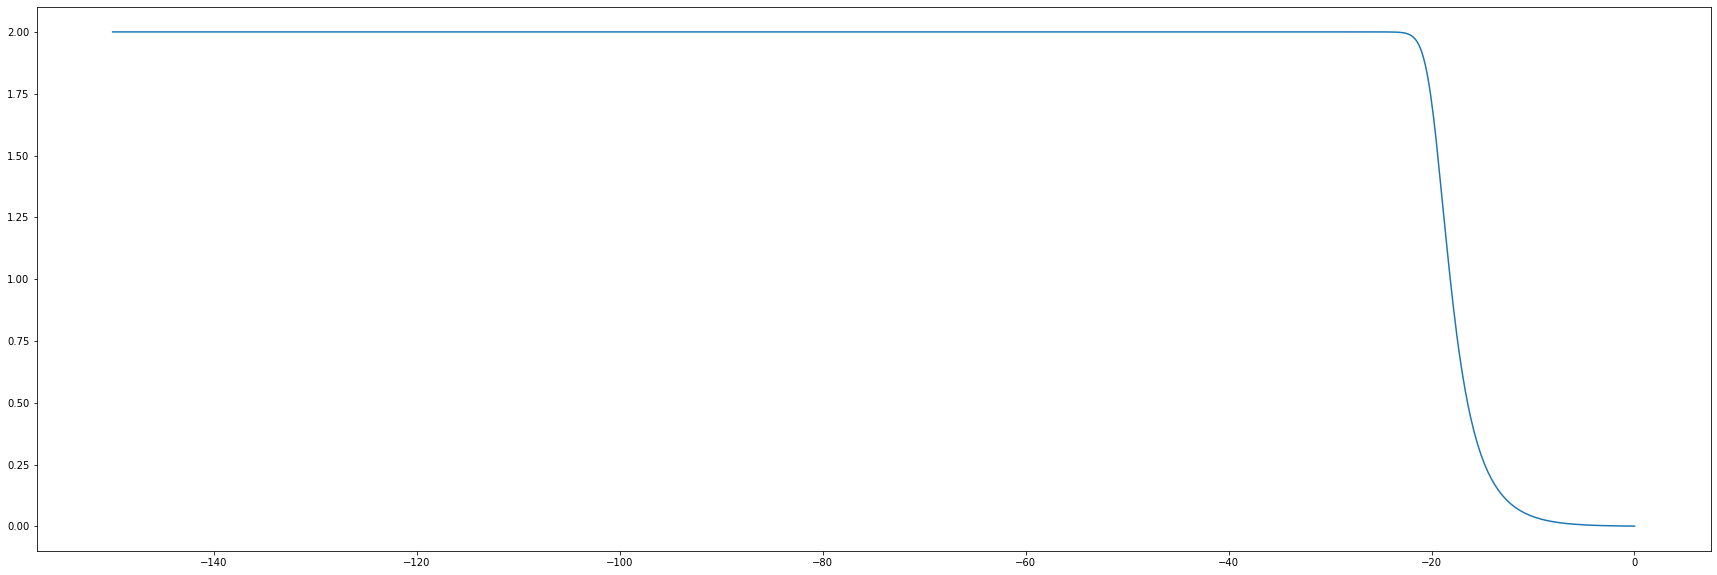

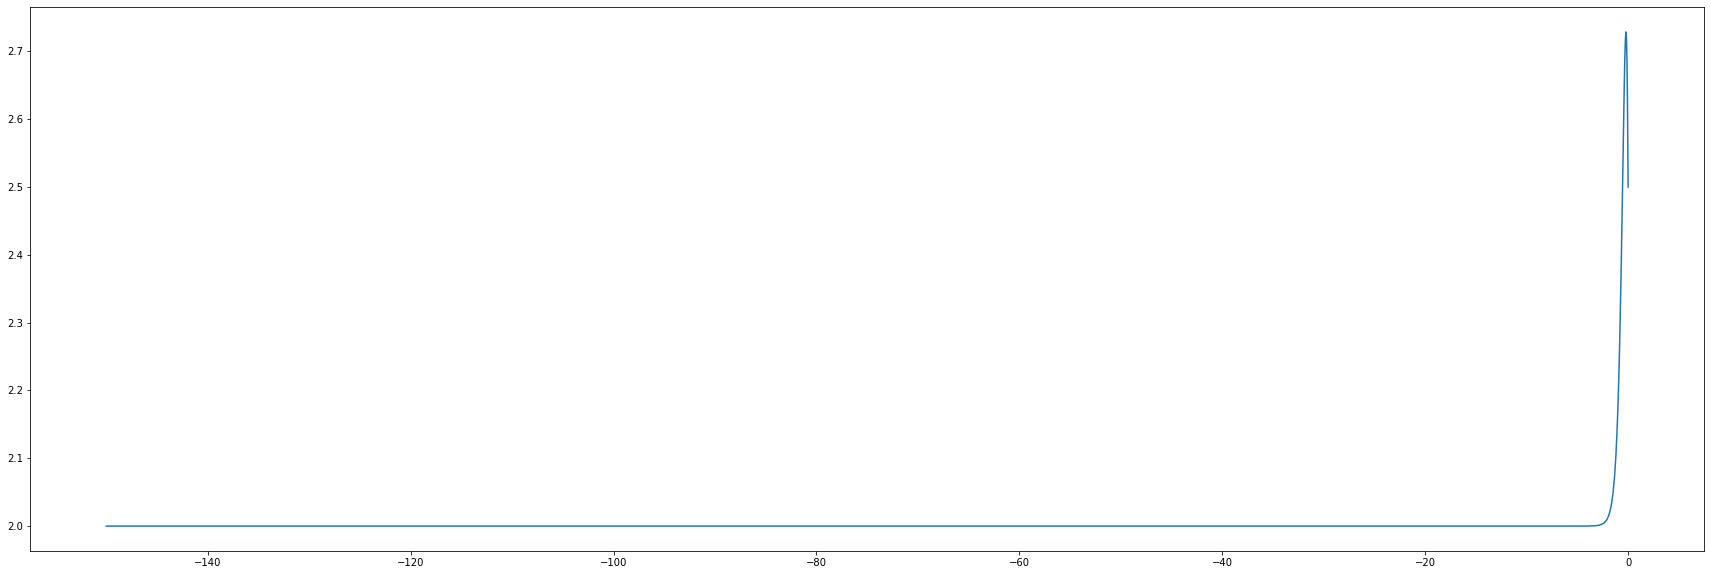

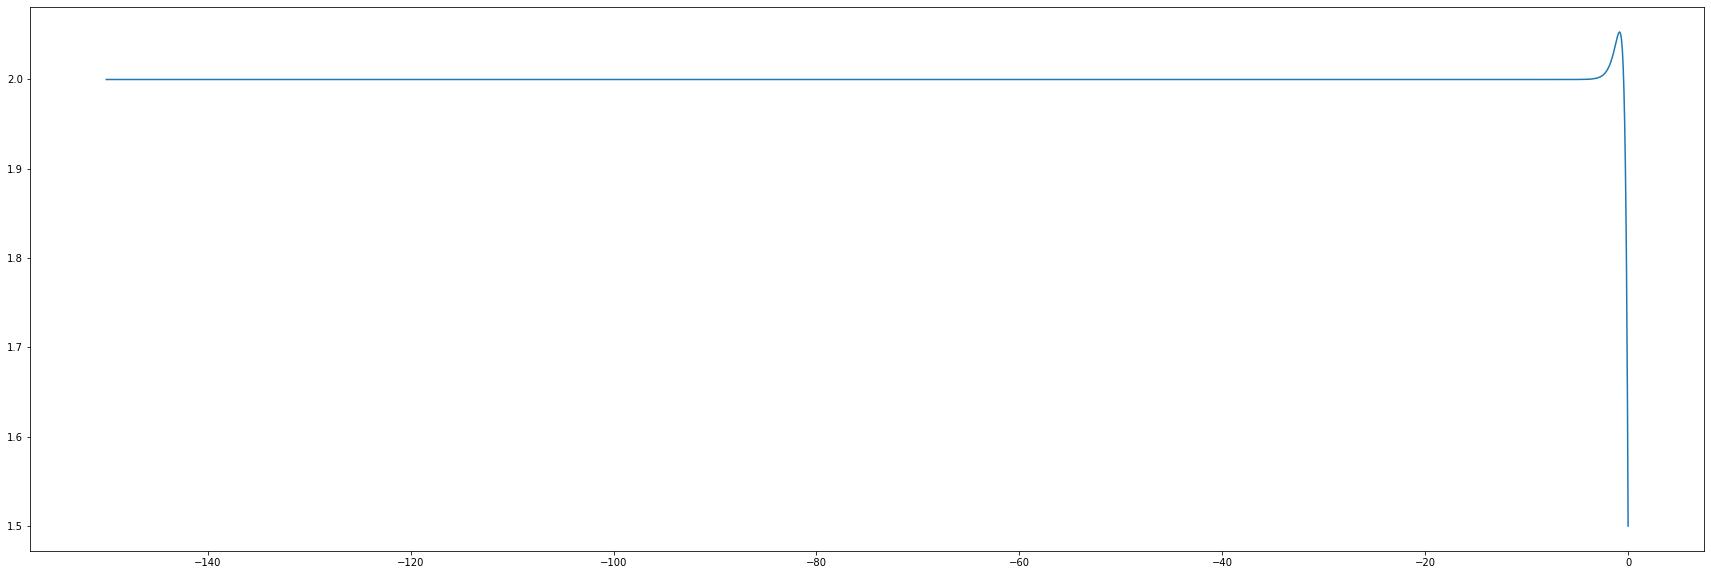

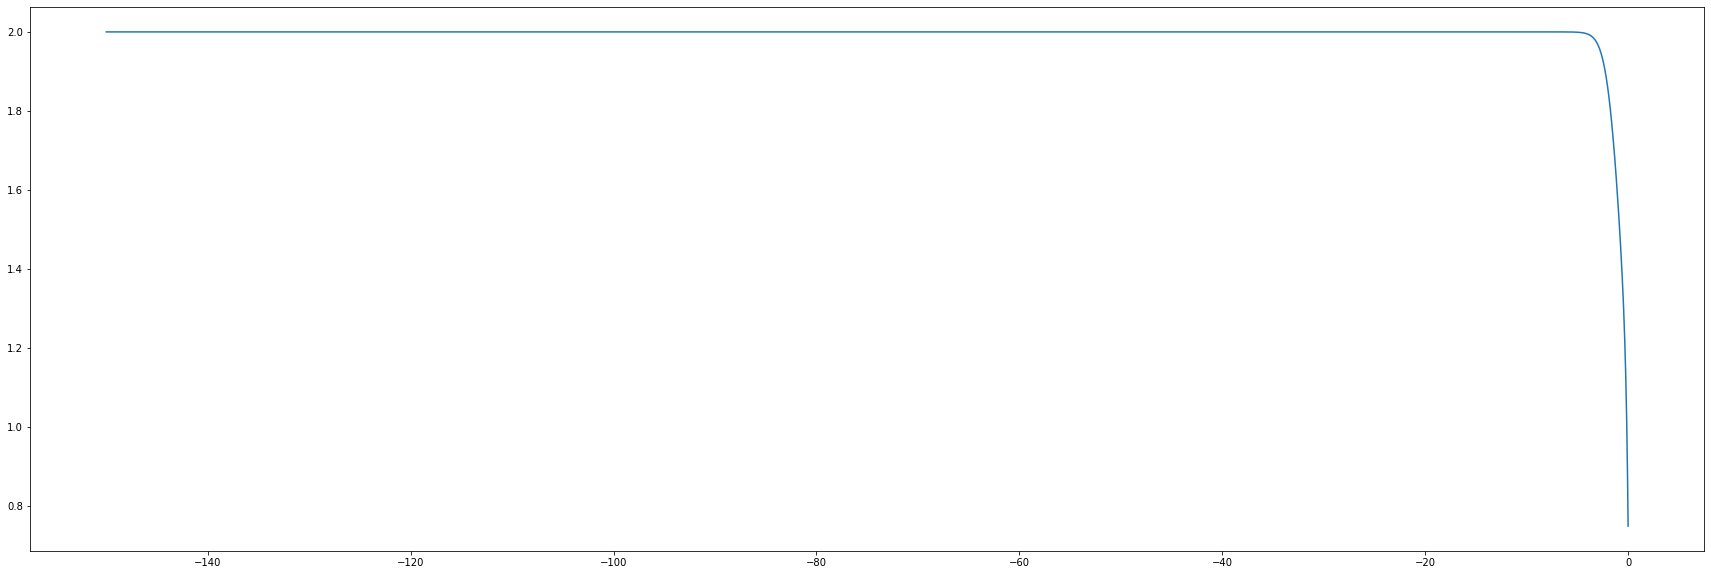

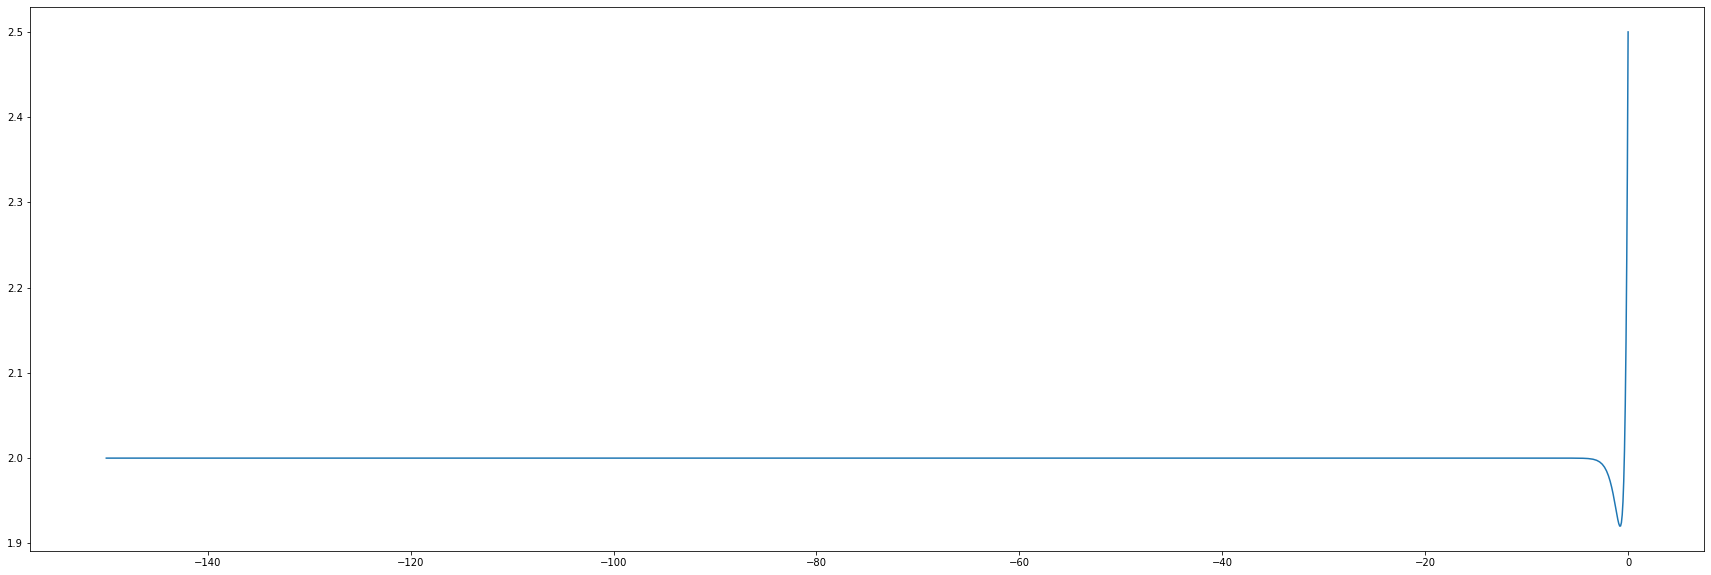

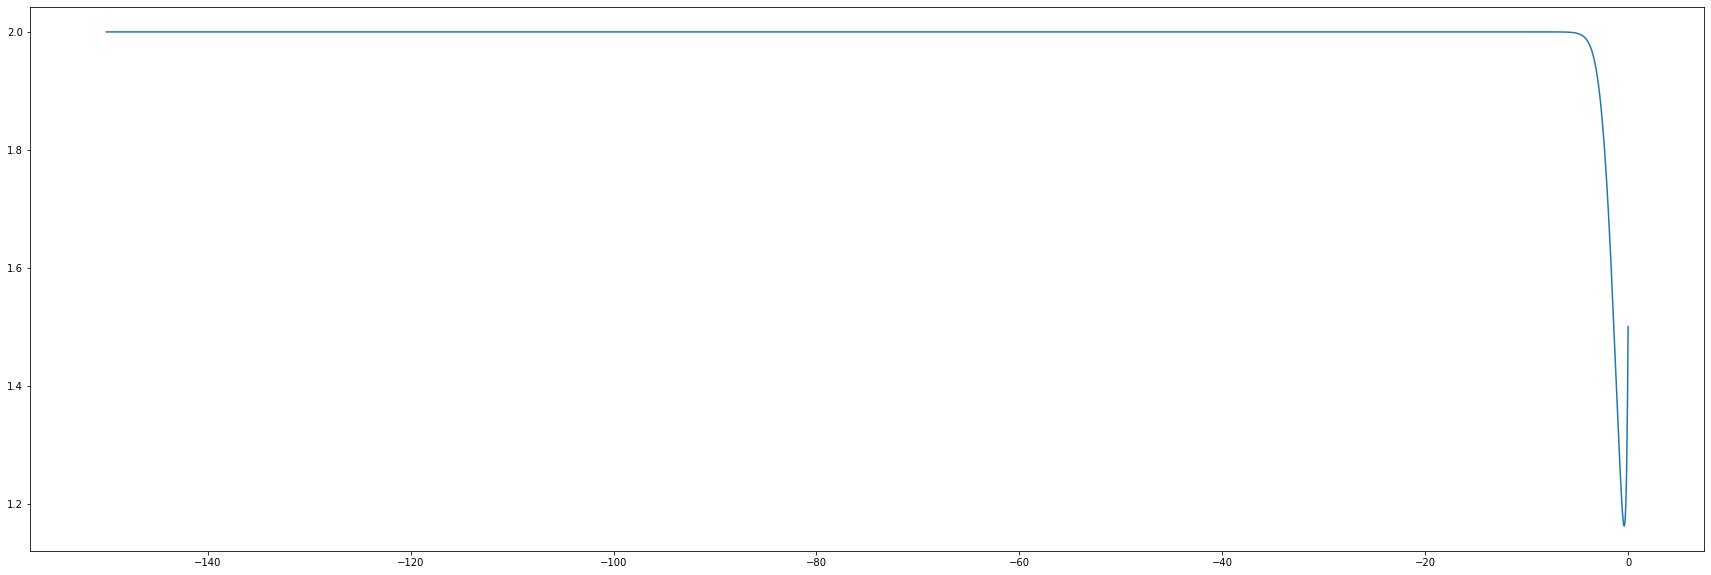

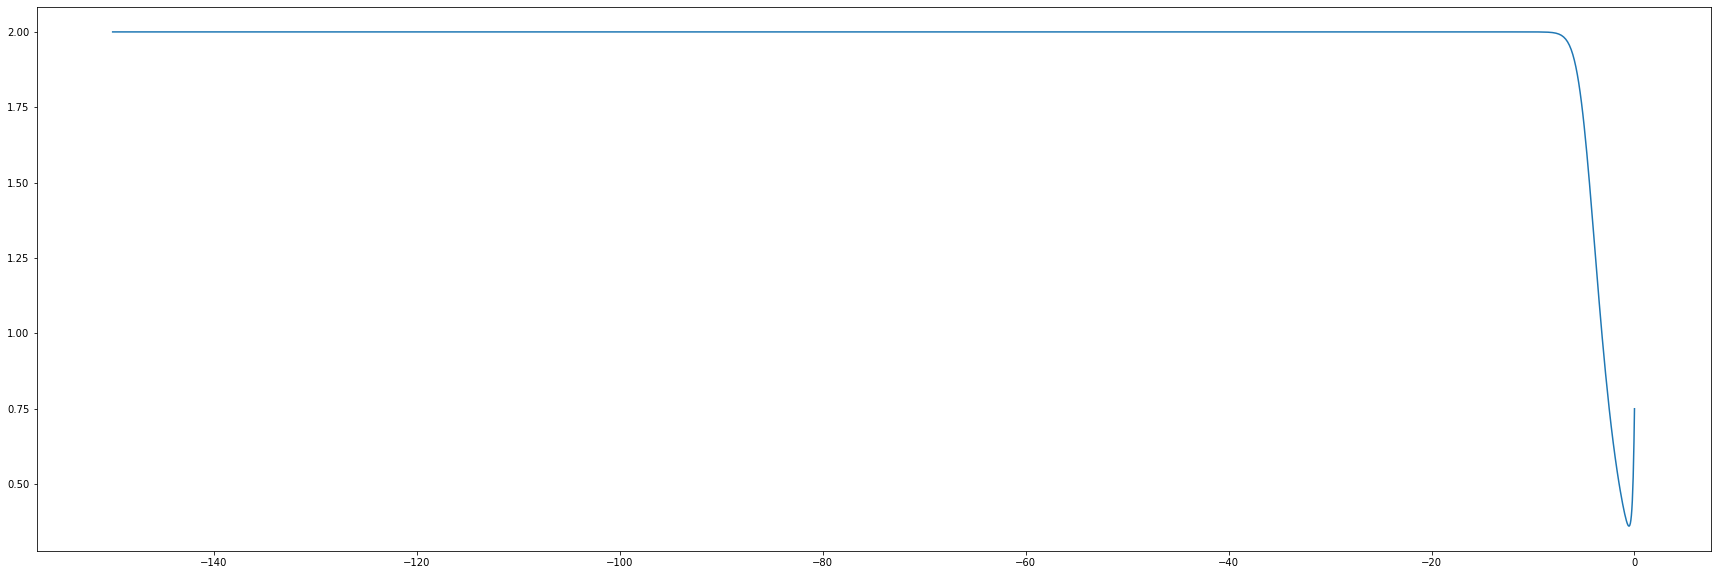

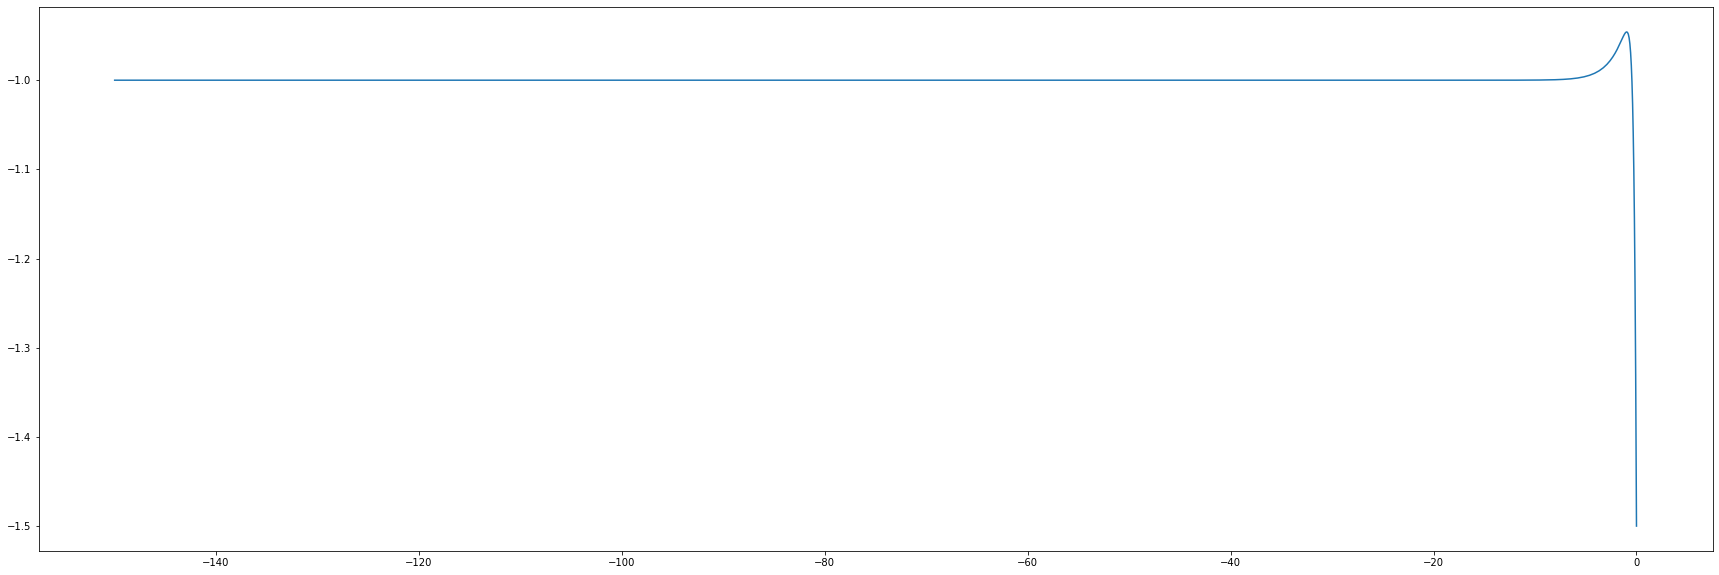

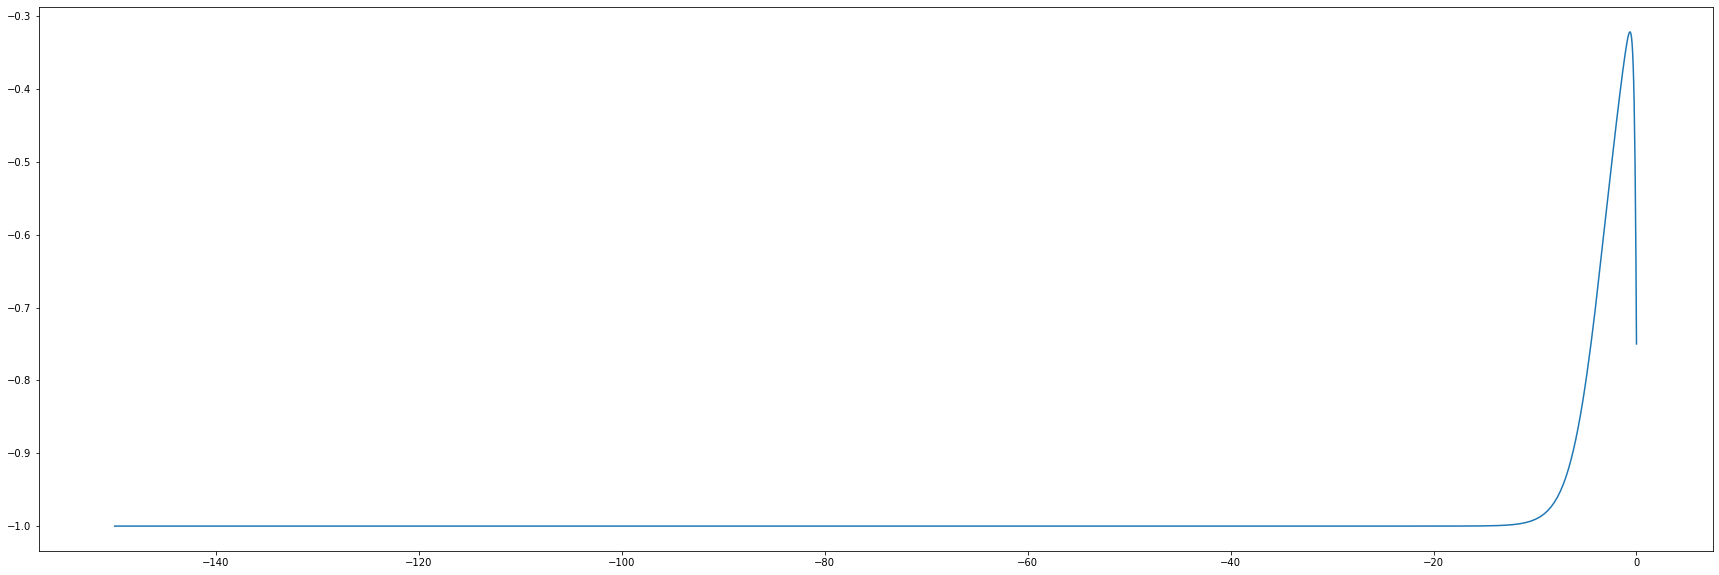

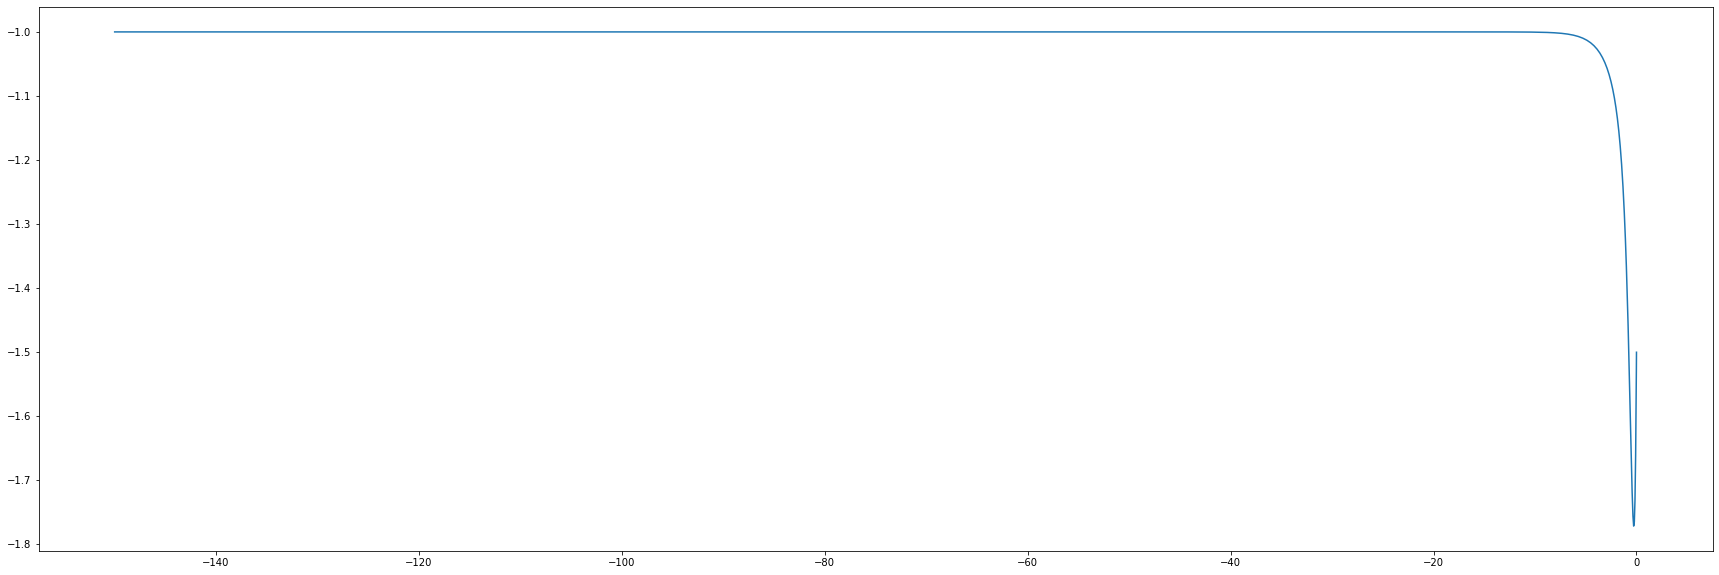

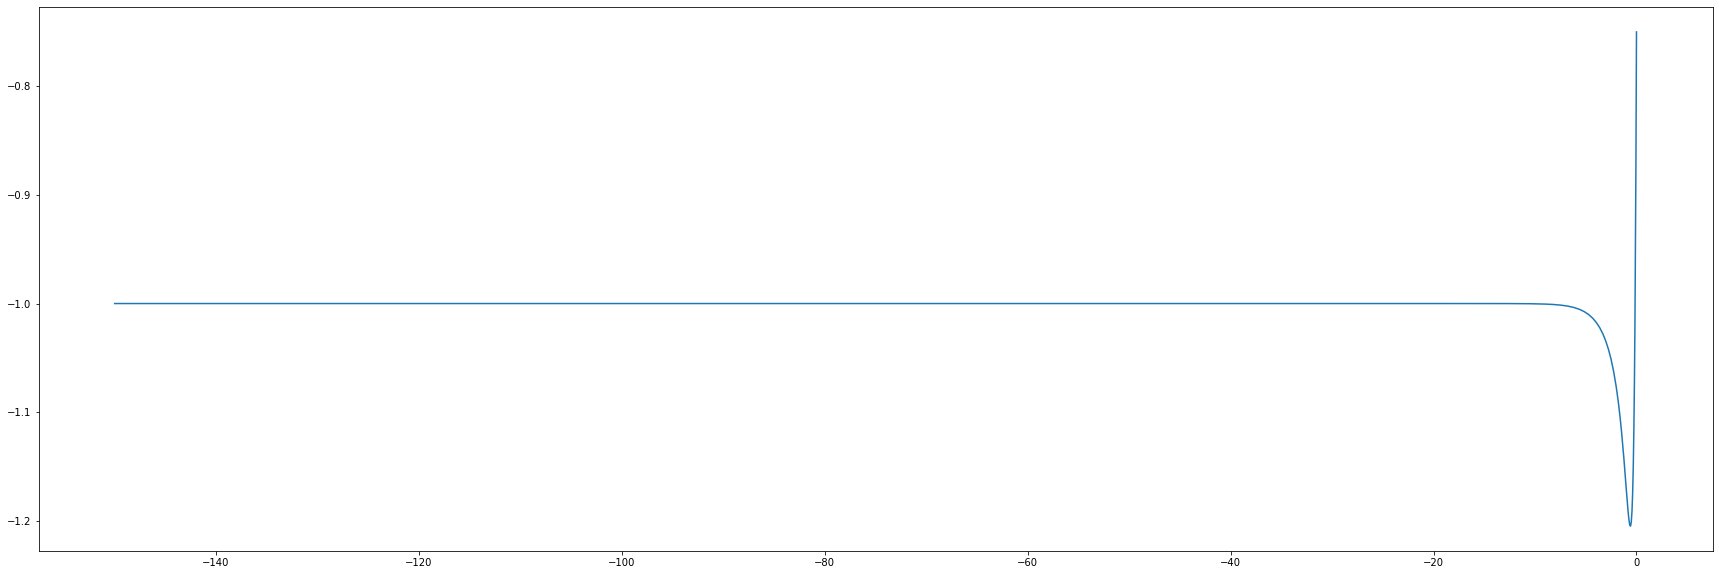

In [320]:
plt.figure(figsize=(30, 10))
for k in range(len(dep4[0])):
    plt.figure(k, figsize=(30, 10))
    x=dep4[1][k]
    t=dep4[0][k]
    plt.plot(t, x)